<a href="https://www.kaggle.com/code/ravivarmaodugu/earthquakes-data-analytics?scriptVersionId=192174727" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Notebook Overview**

Hello dear Kagglers, this is **my 10th notebook submission** on **Kaggle** and I am glad that I have come this far on this wonderful platform. This has happened with all your support and encouragement. I am grateful for that.  

The current notebook aims to explore the [Earthquake dataset](https://www.kaggle.com/datasets/warcoder/earthquake-dataset) which has information about 782 quake events that have taken place around the world between 1/1/2001 and 1/1/2023. 

Key focus areas include **identifying the trends and patterns** across various event parameters including **magnitude**, depth and significance of the events, type of magnitude measurement used, data contributor, and **tsunami occurence** etc.

We also focus on identifying the **event patterns by year**, by month, by day of the month, and by hour of the day.

Later, we identify and visualise the **quake events by country** and analyse the top 3 quake prone countries in detail. 

Plots used in the notebook include bar diagrams, pie charts, histograms, boxplots, scatterplots, lineplots, **treemaps**, **choropleth maps**, and **density mapbox maps**. 

Key takeaways - 

- Filling large number of missing values by a logical approach.
- Comparative analysis of top 3 quake prone countries in the world. 
- Using plotly for mapping. 

So let's get started.

In [1]:
## Import the relevant libraries into the environment
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
import plotly.express as px       ## data visualization & graphical plotting
import squarify                   ## Treemap plots

%matplotlib inline
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.display.float_format = '{:.2f}'.format  ## limiting the decimals in the output to 2 

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset 
df = pd.read_csv('/kaggle/input/earthquake-dataset/earthquake_data.csv')

## Check a few records in the dataset that we just loaded
df.head(5)

title  magnitude         date_time  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands       7.00  22-11-2022 02:03   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia       6.90  18-11-2022 13:37   
2                                      M 7.0 -        7.00  12-11-2022 07:09   
3           M 7.3 - 205 km ESE of Neiafu, Tonga       7.30  11-11-2022 10:48   
4                                      M 6.6 -        6.60  09-11-2022 10:14   

   cdi  mmi  alert  tsunami  sig net  nst  dmin   gap magType  depth  \
0    8    7  green        1  768  us  117  0.51 17.00     mww  14.00   
1    4    4  green        0  735  us   99  2.23 34.00     mww  25.00   
2    3    3  green        1  755  us  147  3.12 18.00     mww 579.00   
3    5    5  green        1  833  us  149  1.86 21.00     mww  37.00   
4    0    2  green        1  670  us  131  5.00 27.00     mww 624.46   

   latitude  longitude                  location continent          country  
0     -9.80     159.60  Malango, Solomon Islands   Oceania  Solomon Islands  
1     -4.96     100.74       Bengkulu, Indonesia       NaN              NaN  
2    -20.05    -178.35                       NaN   Oceania             Fiji  
3    -19.29    -172.13             Neiafu, Tonga       NaN              NaN  
4    -25.59     178.28                       NaN       NaN              NaN

In [3]:
## Check the dataset shape, rows, columns, duplicate entries & missing values
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 782
Number of features (columns) in the dataset are: 19
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 1246


- There are **no duplicate entries** in the dataset.
- However, there are around **1246 missing values** in the dataset. 

In [4]:
## Let's find out which features have null values

df.isnull().sum()[df.isnull().sum() > 0]

alert        367
location       5
continent    576
country      298
dtype: int64

- Location has 5 missing values, whereas, alert, continent and **country** have **hundreds of missing values** each.
- We'll try to find a solution for missing values in later stages of the notebook.


In [5]:
## Have a glance at the dataframe with info() and describe() functions

print('--'*40)
print(df.info())
print('--'*40, '\n', df.describe(include='all').T)
print('--'*40)

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country  

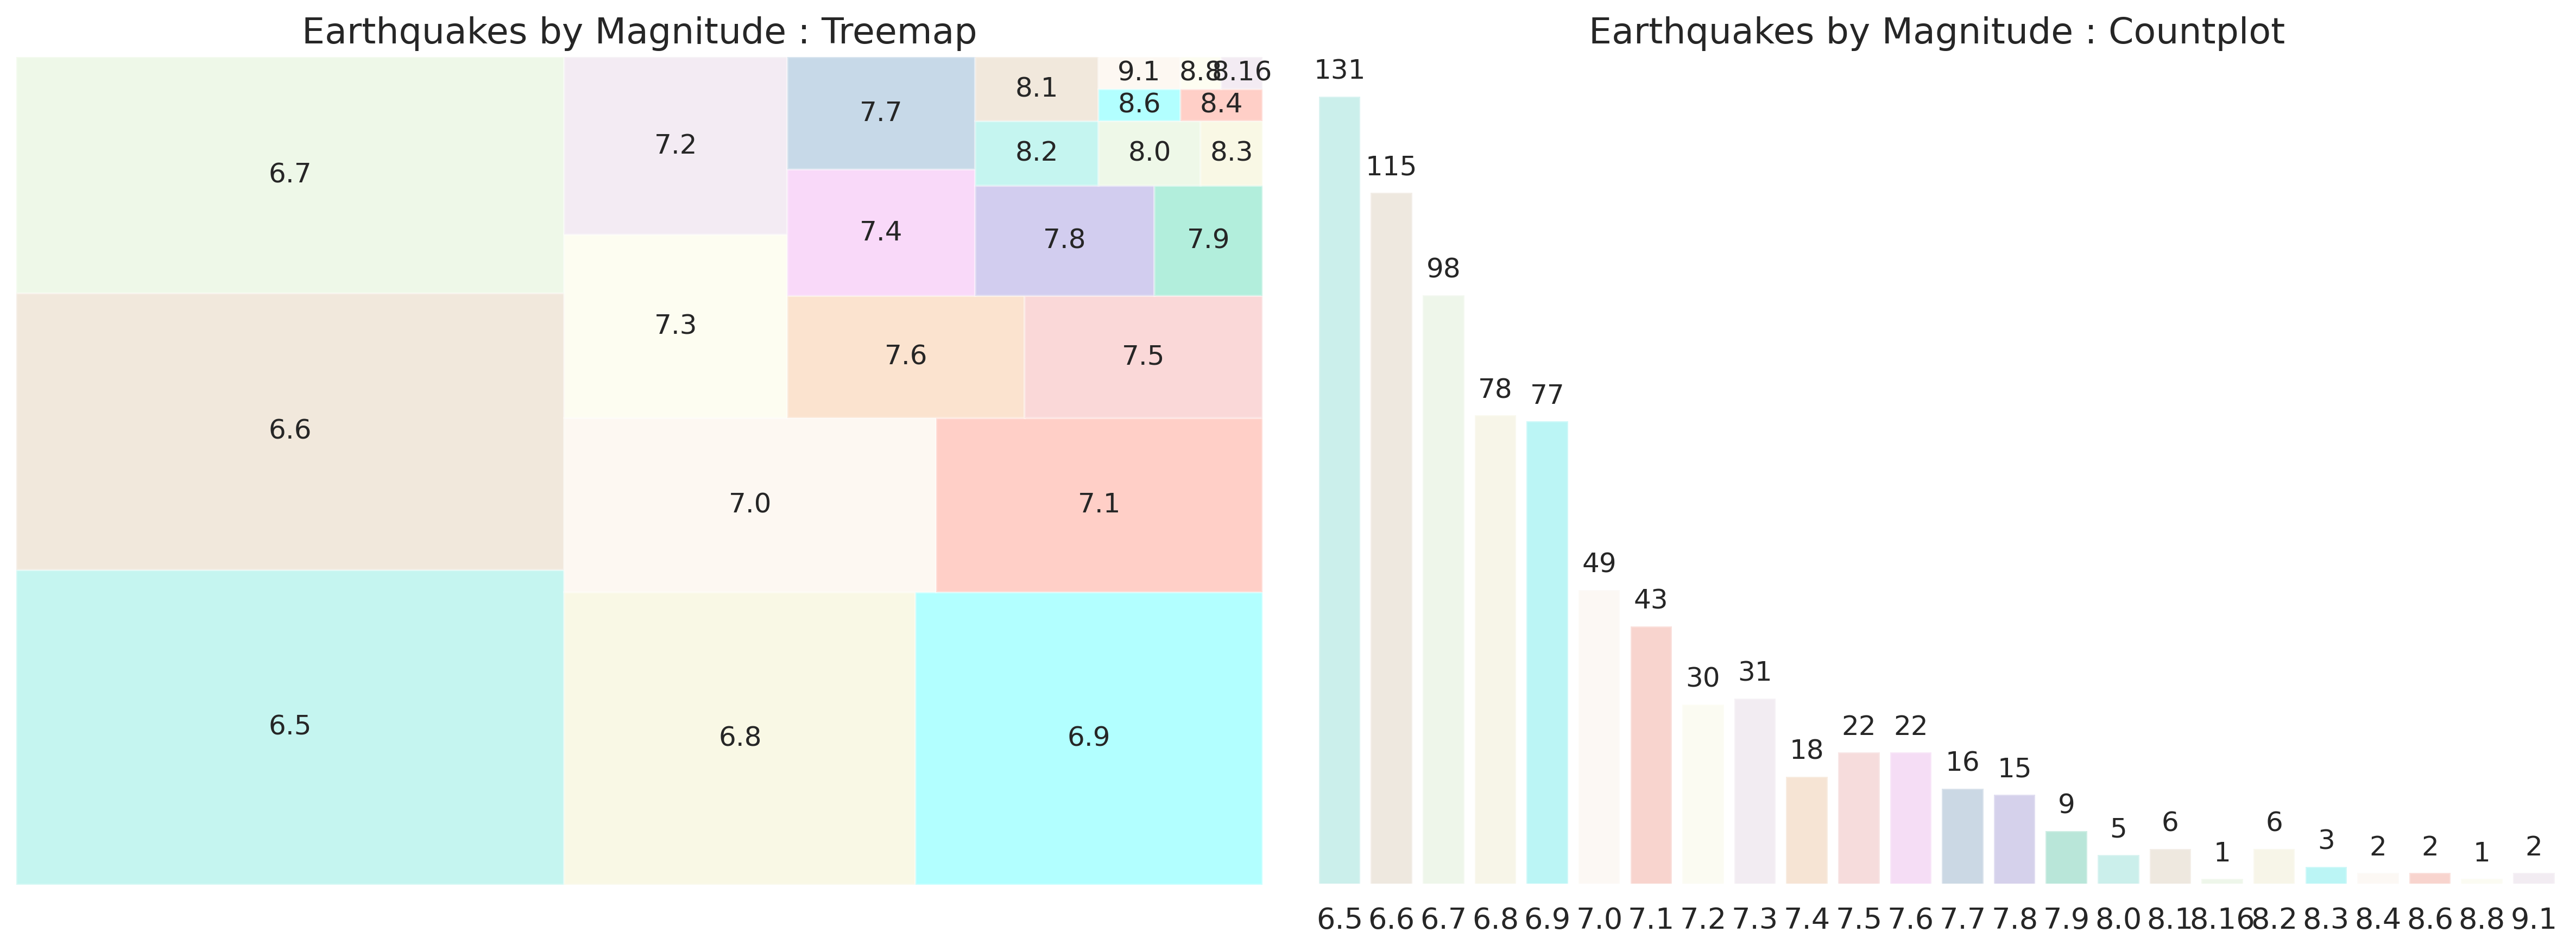

In [6]:
## Let's visualise the Earthquakes by Magnitude, to understand it in a better way

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True, 'figure.dpi':300, 'savefig.dpi':300})
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)

plt.title('Earthquakes by Magnitude : Treemap',fontsize=16)
labels = df['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.3)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude : Countplot', fontsize=16)
ax = sns.countplot(x='magnitude', data=df, palette=my_col, alpha=0.3)
for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 2), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
        
plt.show()

- **6.5 magnitude** has been recorded in highest number of events, followed by 6.6, 6.7, 6.8 6.9, 7.0, and so on.

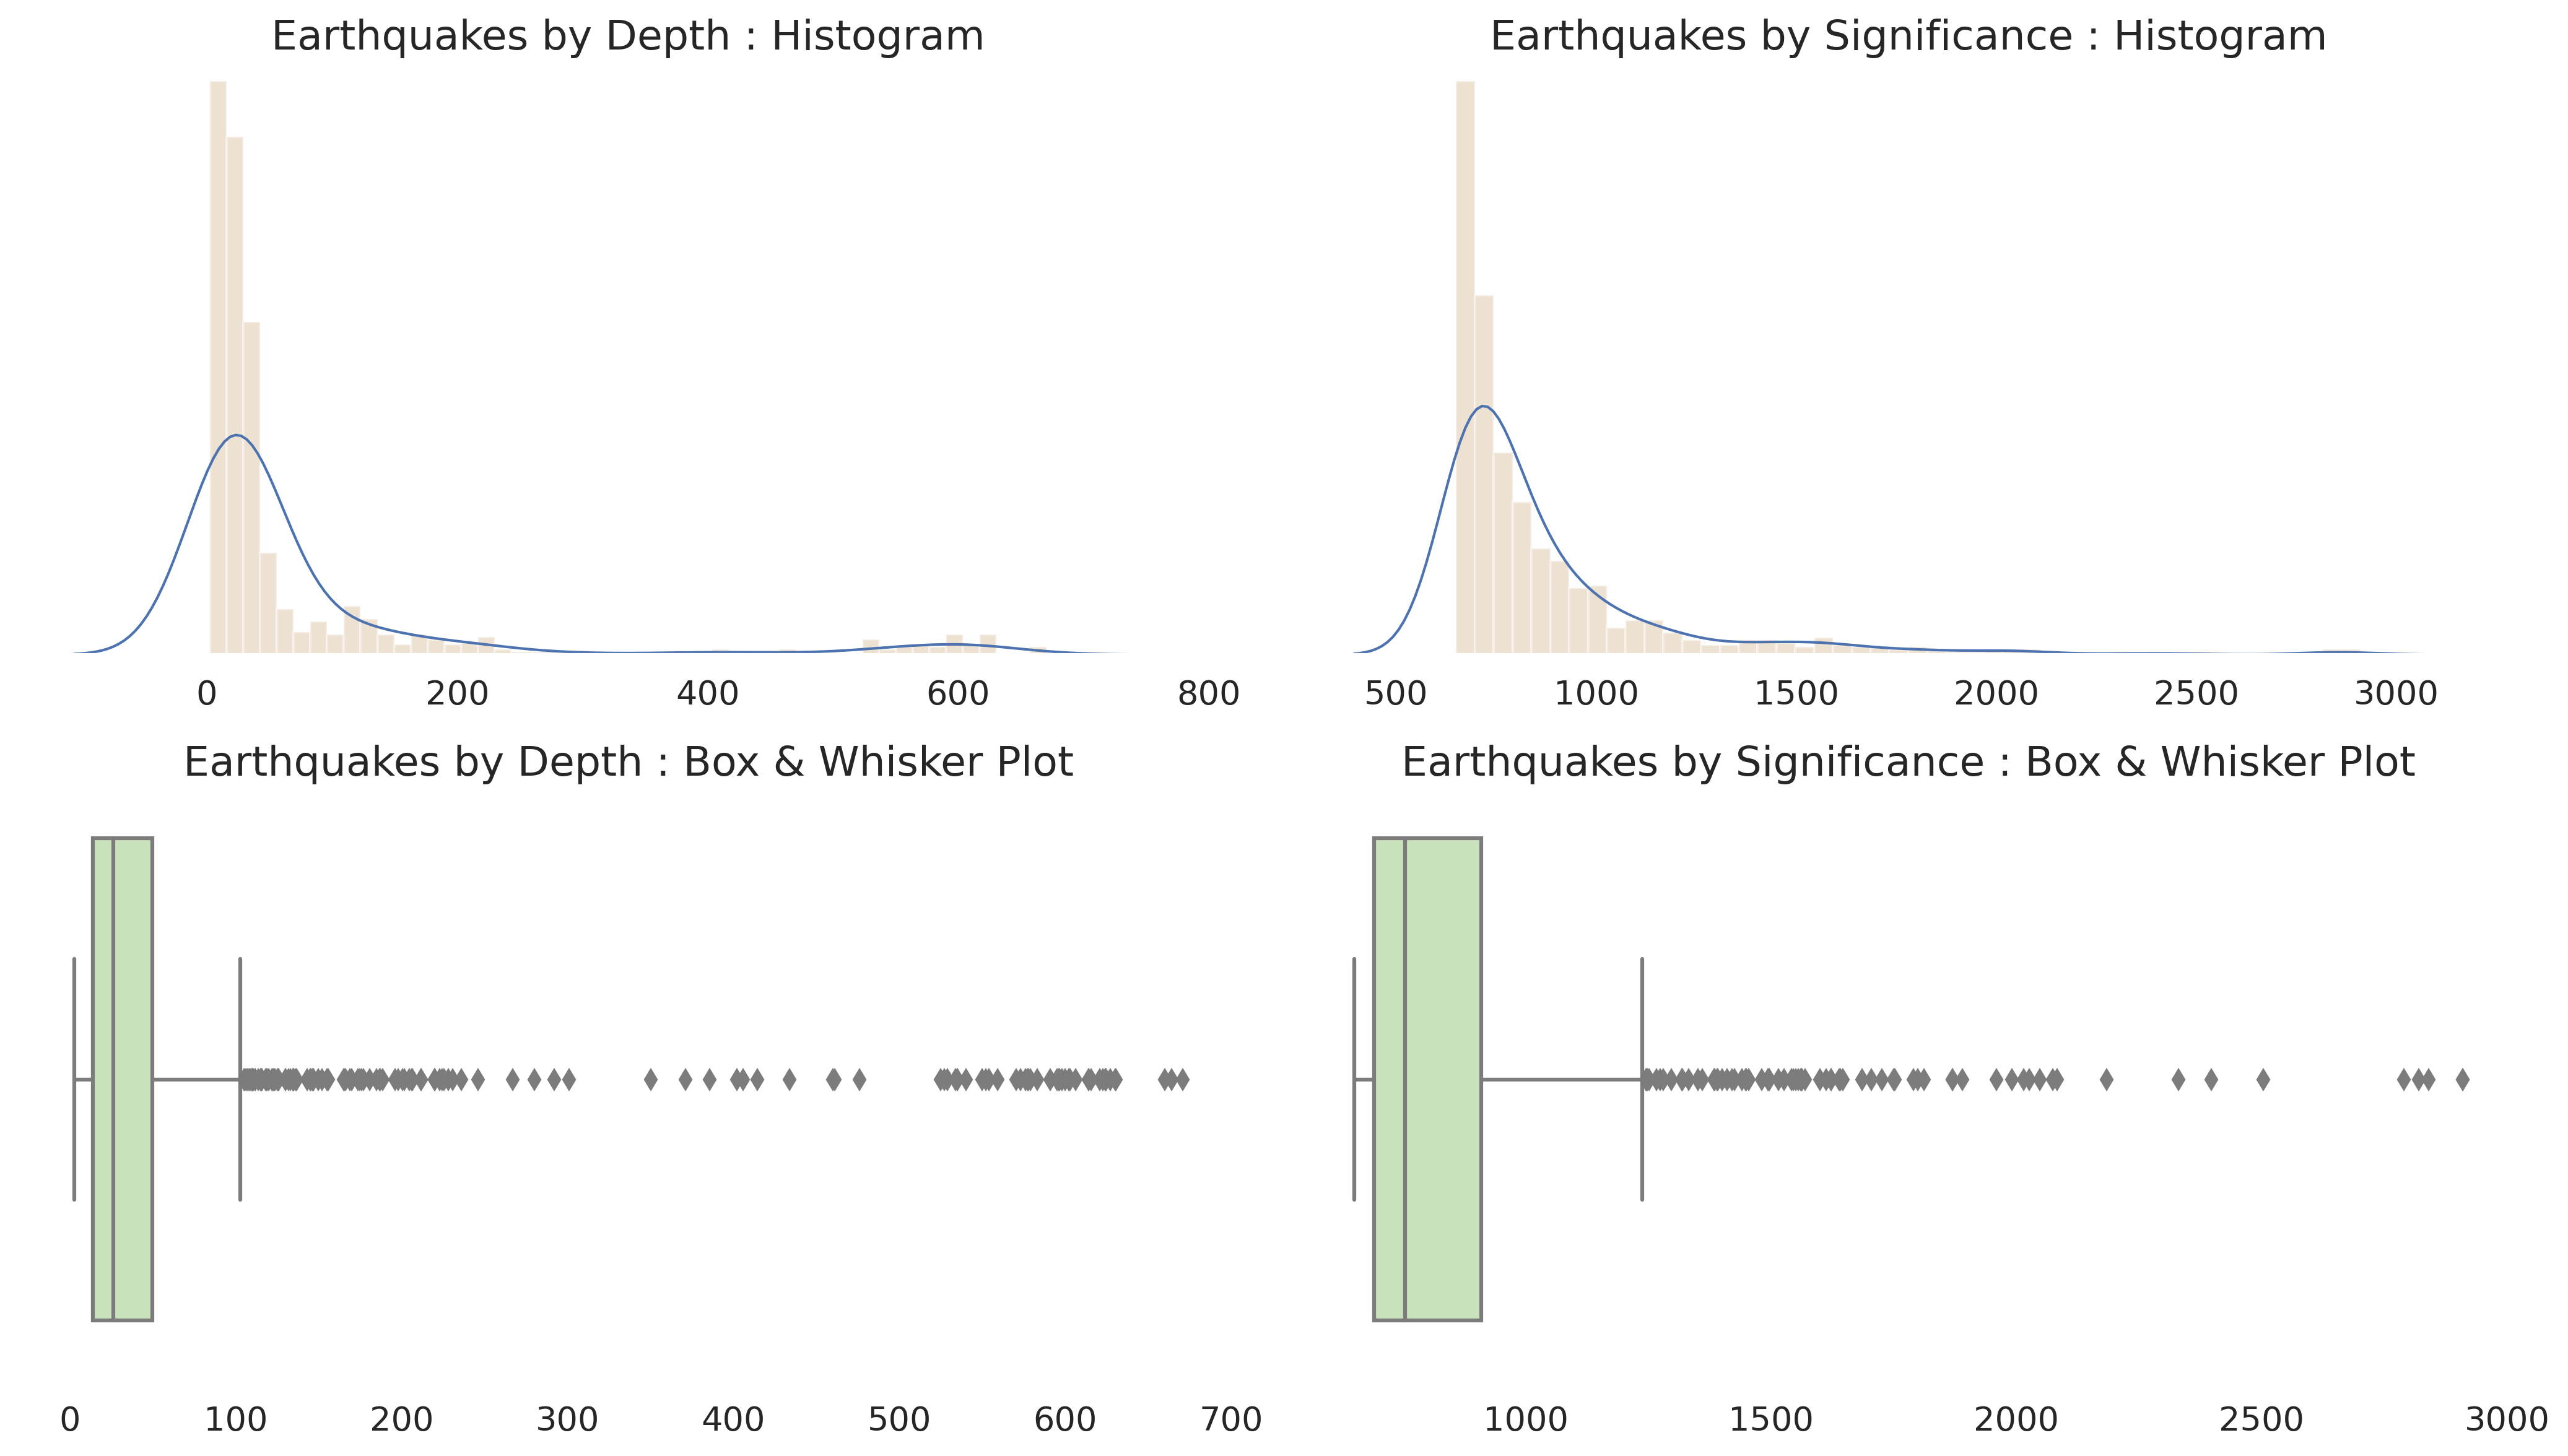

In [7]:
## Let's understand the patterns in earthquake depth and significance
## We'll use histograms and box & whisker plots to identify the trend

plt.subplots(figsize=(14,8))

plt.subplot(2,2,1)
plt.title('Earthquakes by Depth : Histogram', pad=1, fontsize=16)
sns.distplot(df['depth'], color="#D2B48C", kde_kws={'linewidth':1,'color':'b'})
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(2,2,2)
plt.title('Earthquakes by Significance : Histogram', pad=1, fontsize=16)
sns.distplot(df['sig'], color="#D2B48C", kde_kws={'linewidth':1,'color':'b'})
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(2,2,3)
plt.title('Earthquakes by Depth : Box & Whisker Plot', pad=1, fontsize=16)
sns.boxplot(df['depth'], color="#c7e9b4", orient='h')
plt.ylabel(None), plt.xlabel(None), plt.yticks([])

plt.subplot(2,2,4)
plt.title('Earthquakes by Significance : Box & Whisker Plot', pad=1, fontsize=16)
sns.boxplot(df['sig'], color="#c7e9b4", orient='h')
plt.ylabel(None), plt.xlabel(None), plt.yticks([])

plt.show()

**Some Observations**

- Most earthquakes have occured at **depths below 100 points**. Median depth of all quakes is around 30.
- In terms of significance, most earthquakes have **significance below 1000**. Median significance appears to be at around 700. 

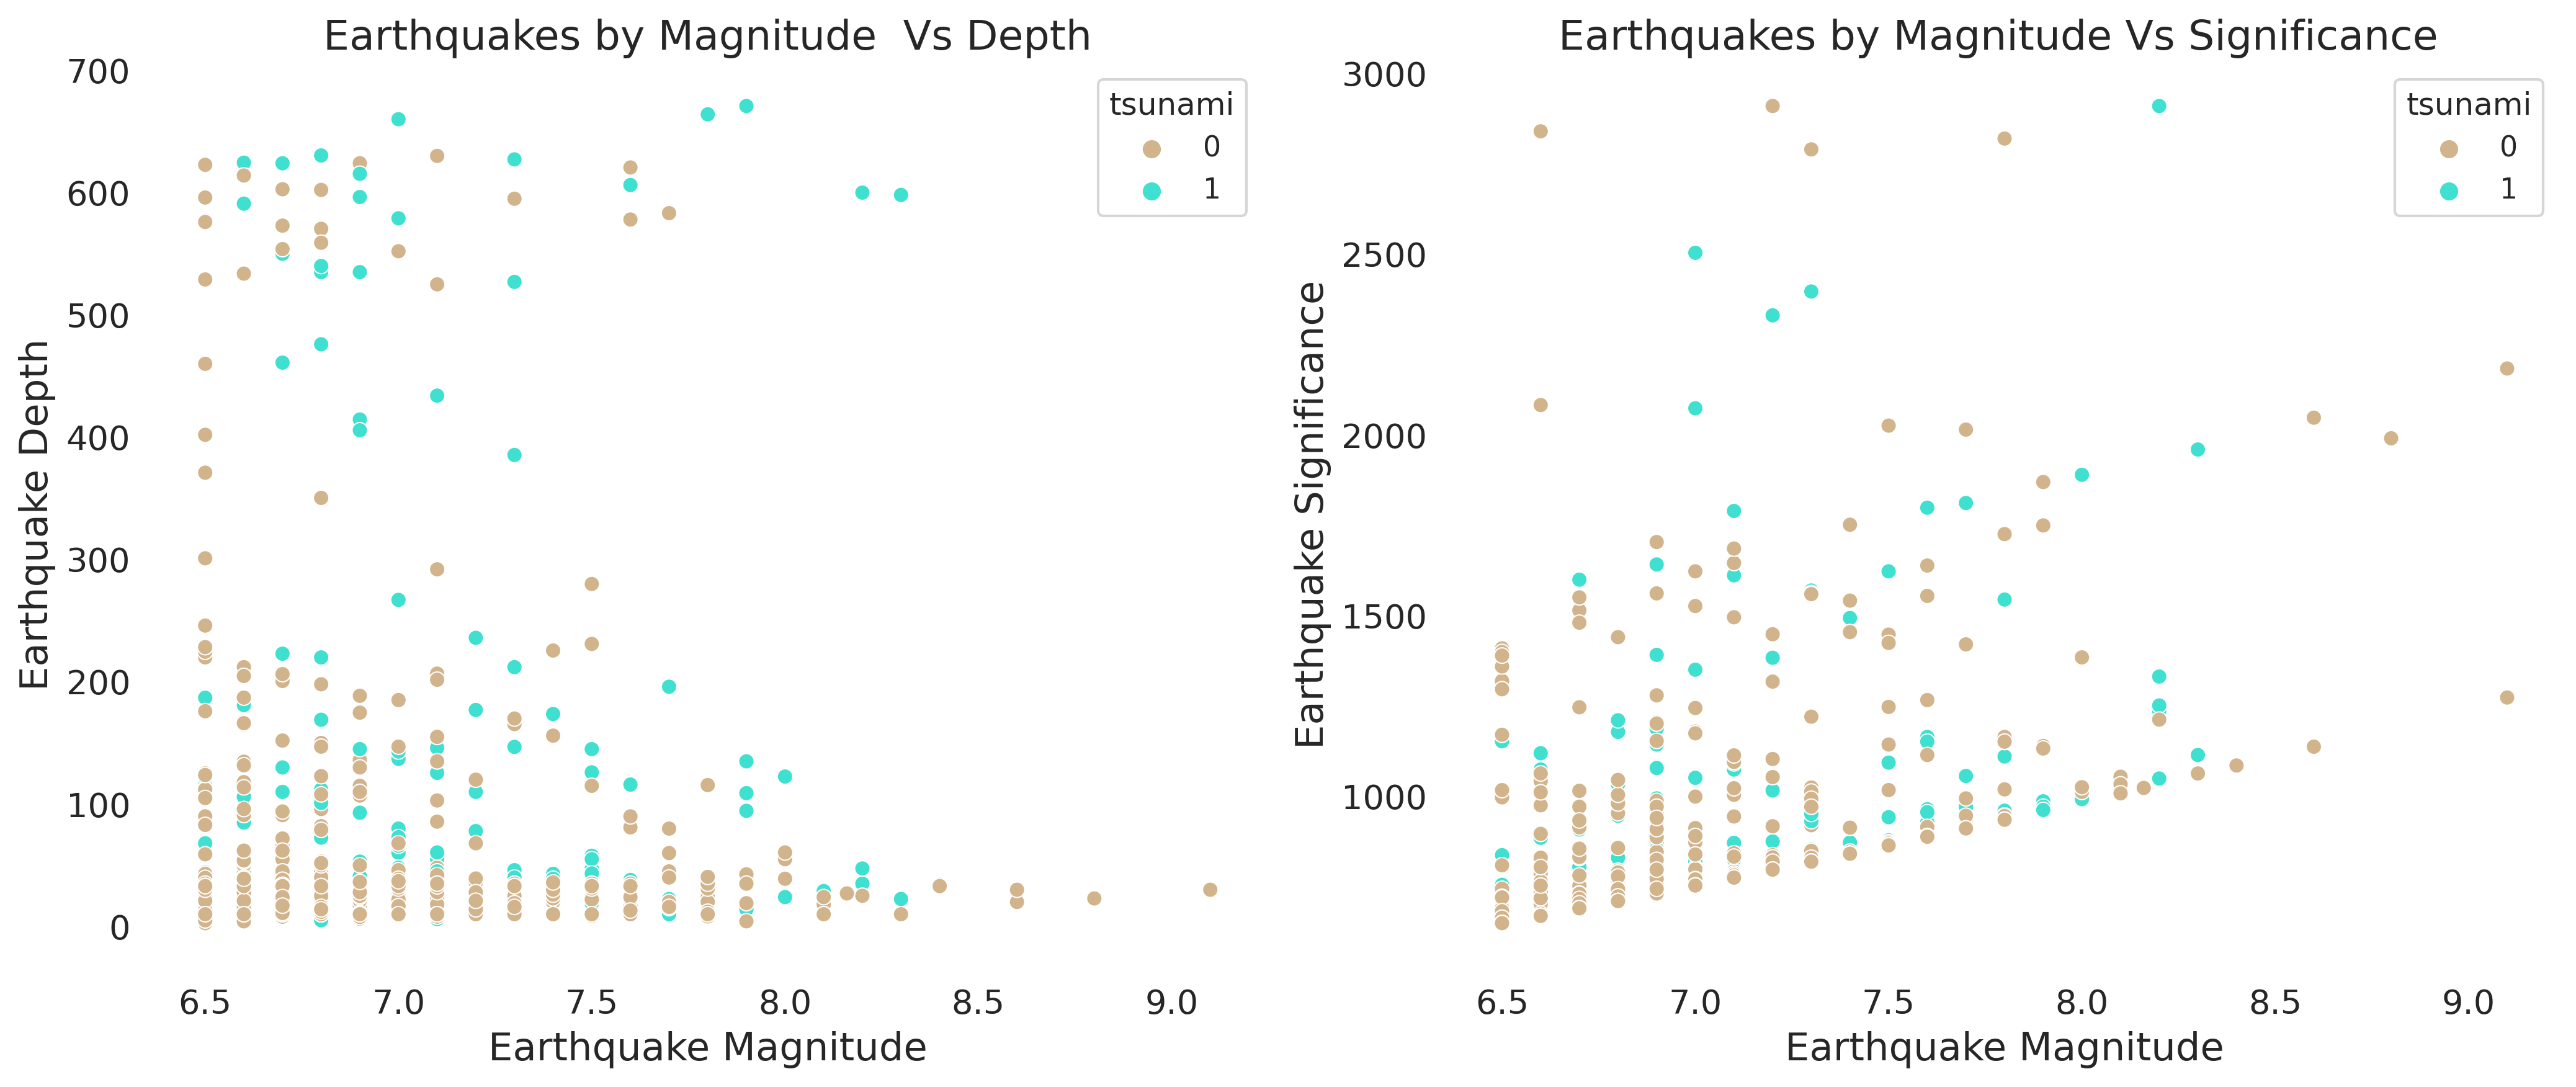

In [8]:
## Let's understand the relationship between magnitude vs depth and magnitude vs Significance

plt.subplots(figsize=(14,6))
my_pal = ('#D2B48C','#40E0D0')
          
plt.subplot(1,2,1)
plt.title('Earthquakes by Magnitude  Vs Depth',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='depth', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Depth', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude Vs Significance ',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='sig', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Significance', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.show()

- As such there is **not much correlation** between earthquake magnitude and depth, and the tsunami occurence. 
- However, there appears to be **a certain degree of correlation** between earthquake magnitude and earthquake significance.

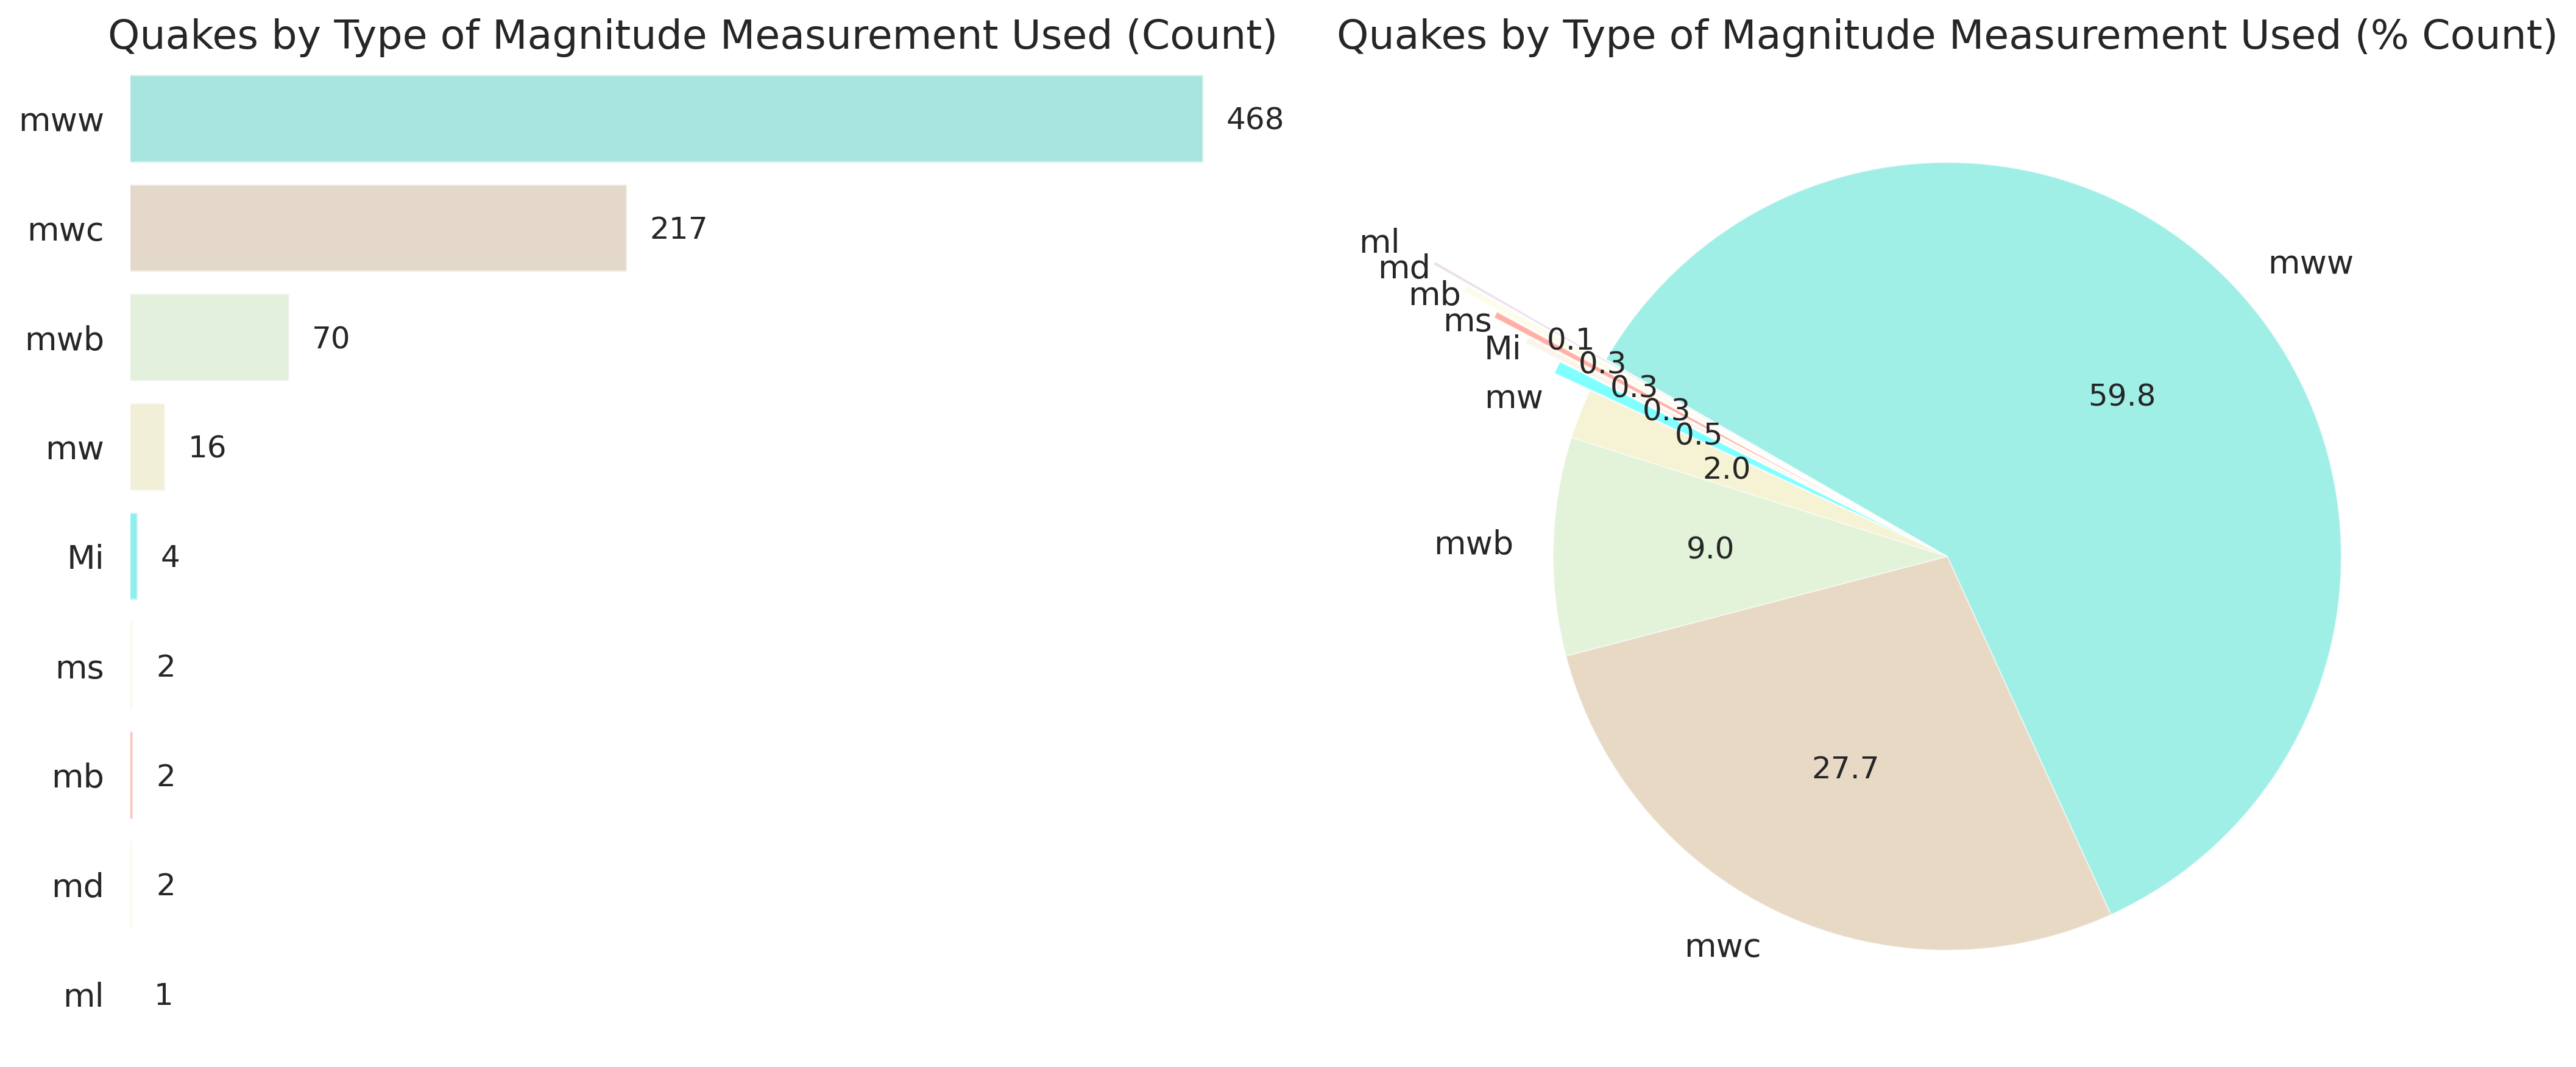

In [9]:
## Let's visualise earthquakes by type of magnitude measurement used

plt.subplots(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Quakes by Type of Magnitude Measurement Used (Count)', fontsize=16)
ax = sns.countplot(y='magType', data=df, palette=my_col, alpha=0.5, order=df['magType'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 10, p.get_y()+0.5))
plt.ylabel(None), plt.xlabel(None), plt.xticks([])

plt.subplot(1,2,2)
plt.title('Quakes by Type of Magnitude Measurement Used (% Count)',fontsize=16)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.1, 0.20, 0.30, 0.40, 0.50]
df['magType'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.5, 'edgecolor' : 'white','linewidth': 0.5, 'antialiased': True}, autopct='%1.1f')

plt.show()

- **Mww (Moment W-phase method)** is the most widely used type of magnitude measurement, with about 60% share in overall events. 
- **Mwc (centroid method)** and **Mwb (body wave method)** represent other major types of magnitude measurement, representing 28% and 9% share, respectively.

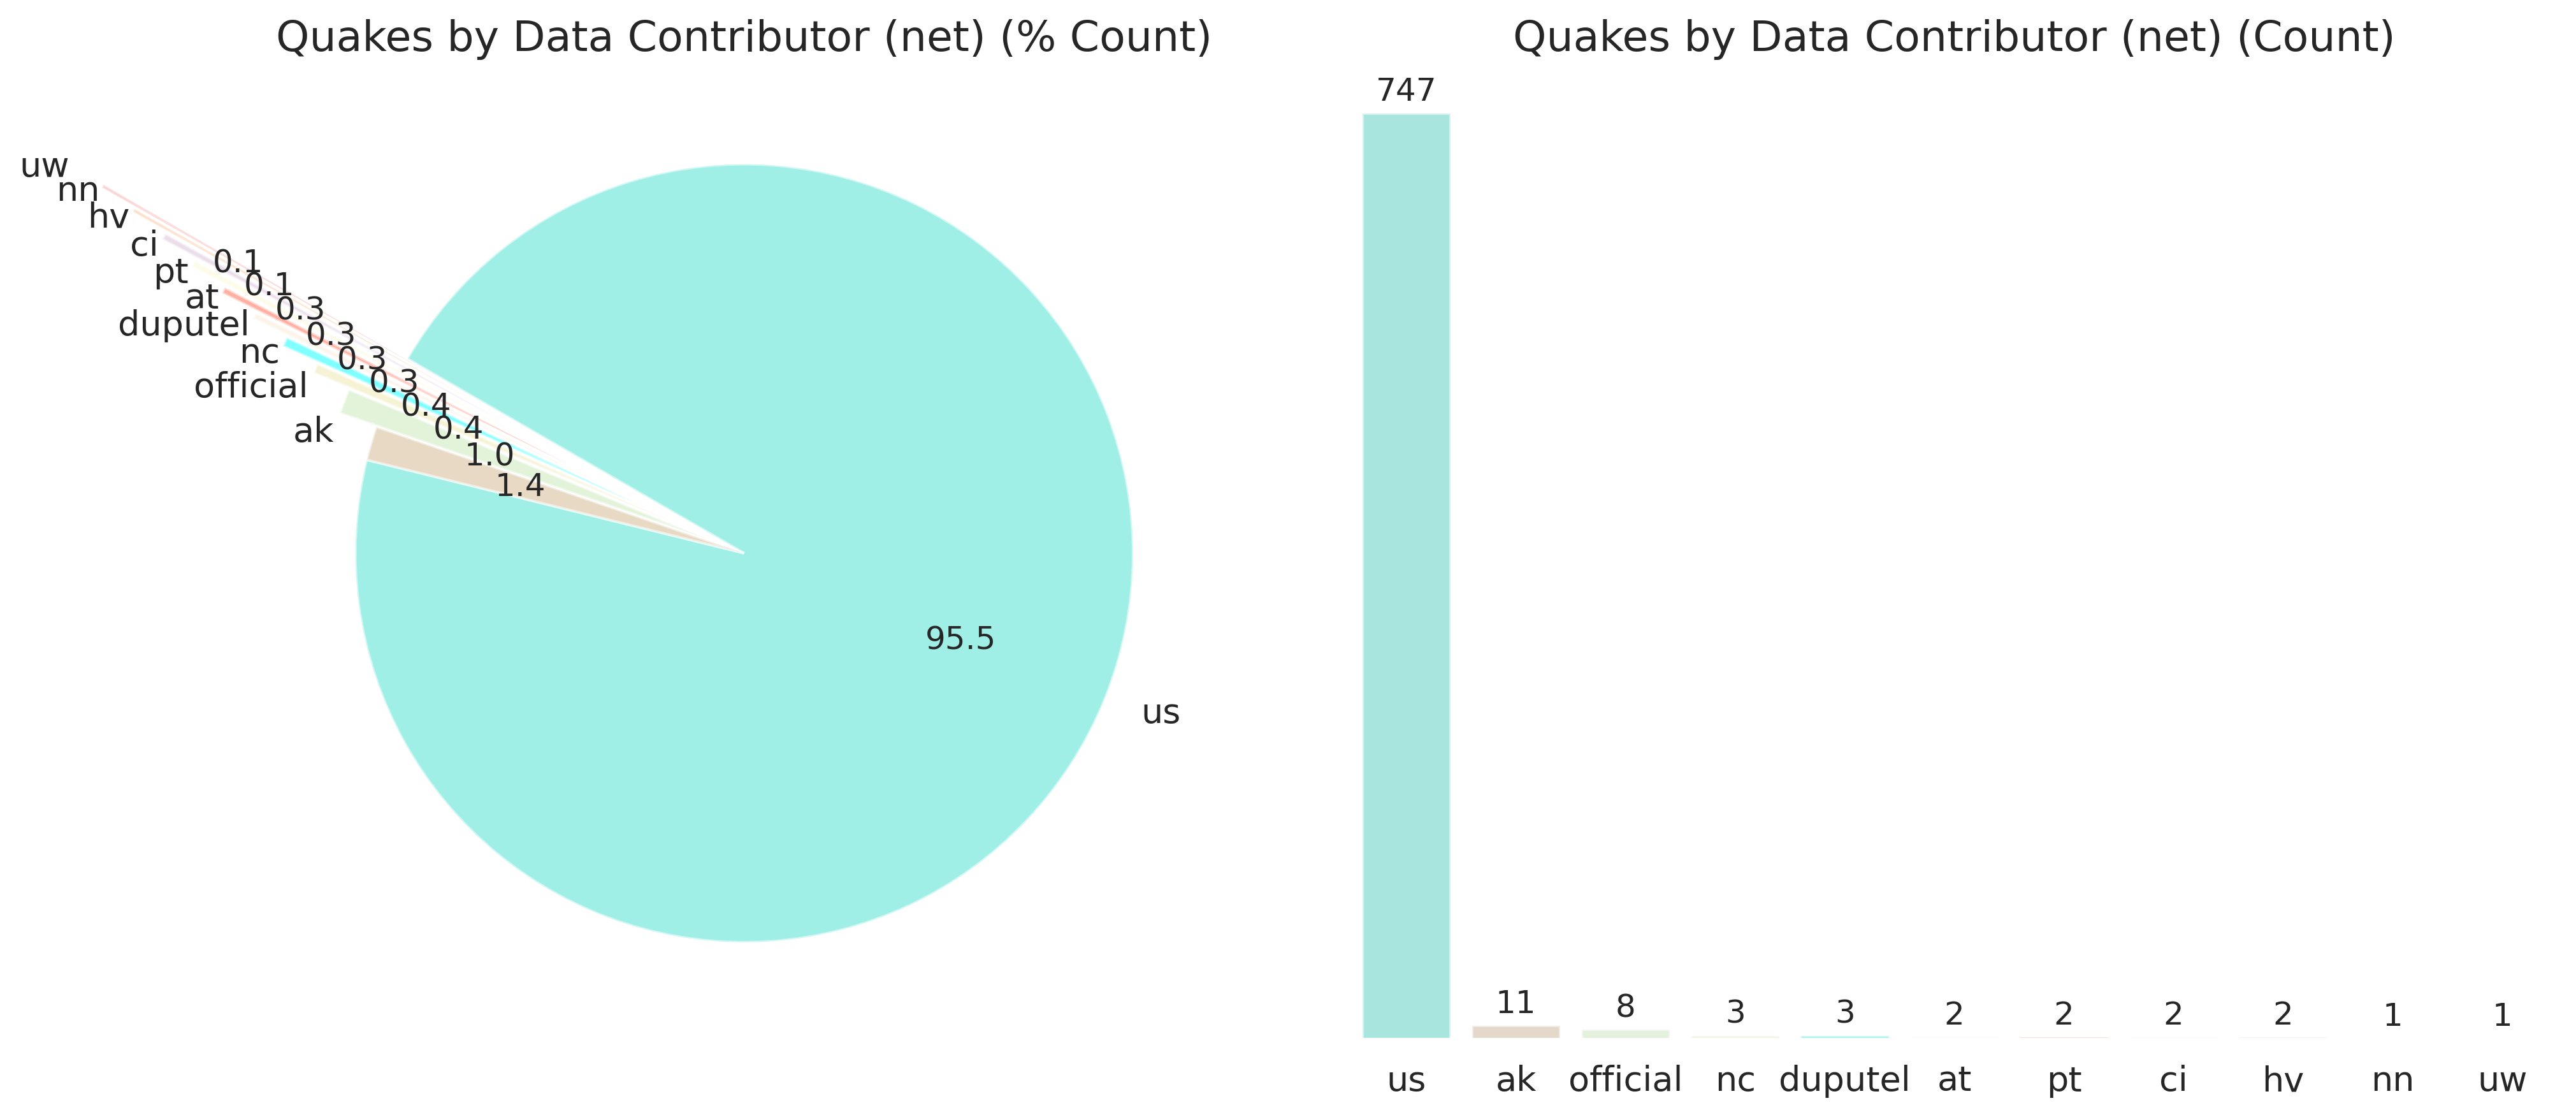

In [10]:
## Make plots for Earthquakes by Data Contributor

plt.subplots(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Quakes by Data Contributor (net) (% Count)', fontsize=16)
my_xpl = [0.0, 0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
df['net'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.5, 'edgecolor' : 'white','linewidth': 1, 'antialiased': True}, autopct='%1.1f')

plt.subplot(1,2,2)
plt.title('Quakes by Data Contributor (net) (Count)', fontsize=16)
ax = sns.countplot(x="net", data=df, palette=my_col, alpha=0.5, order=df['net'].value_counts().index)
for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 5), ha='center', va='bottom')
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.show()

- **US** is the preferred data contributor of earthquake data, as you can see the **contribution of US is over 95%**. 
- The remaining 10 data contributors account for a mere 4.5% share, which makes them trivial and US source, most prominent.

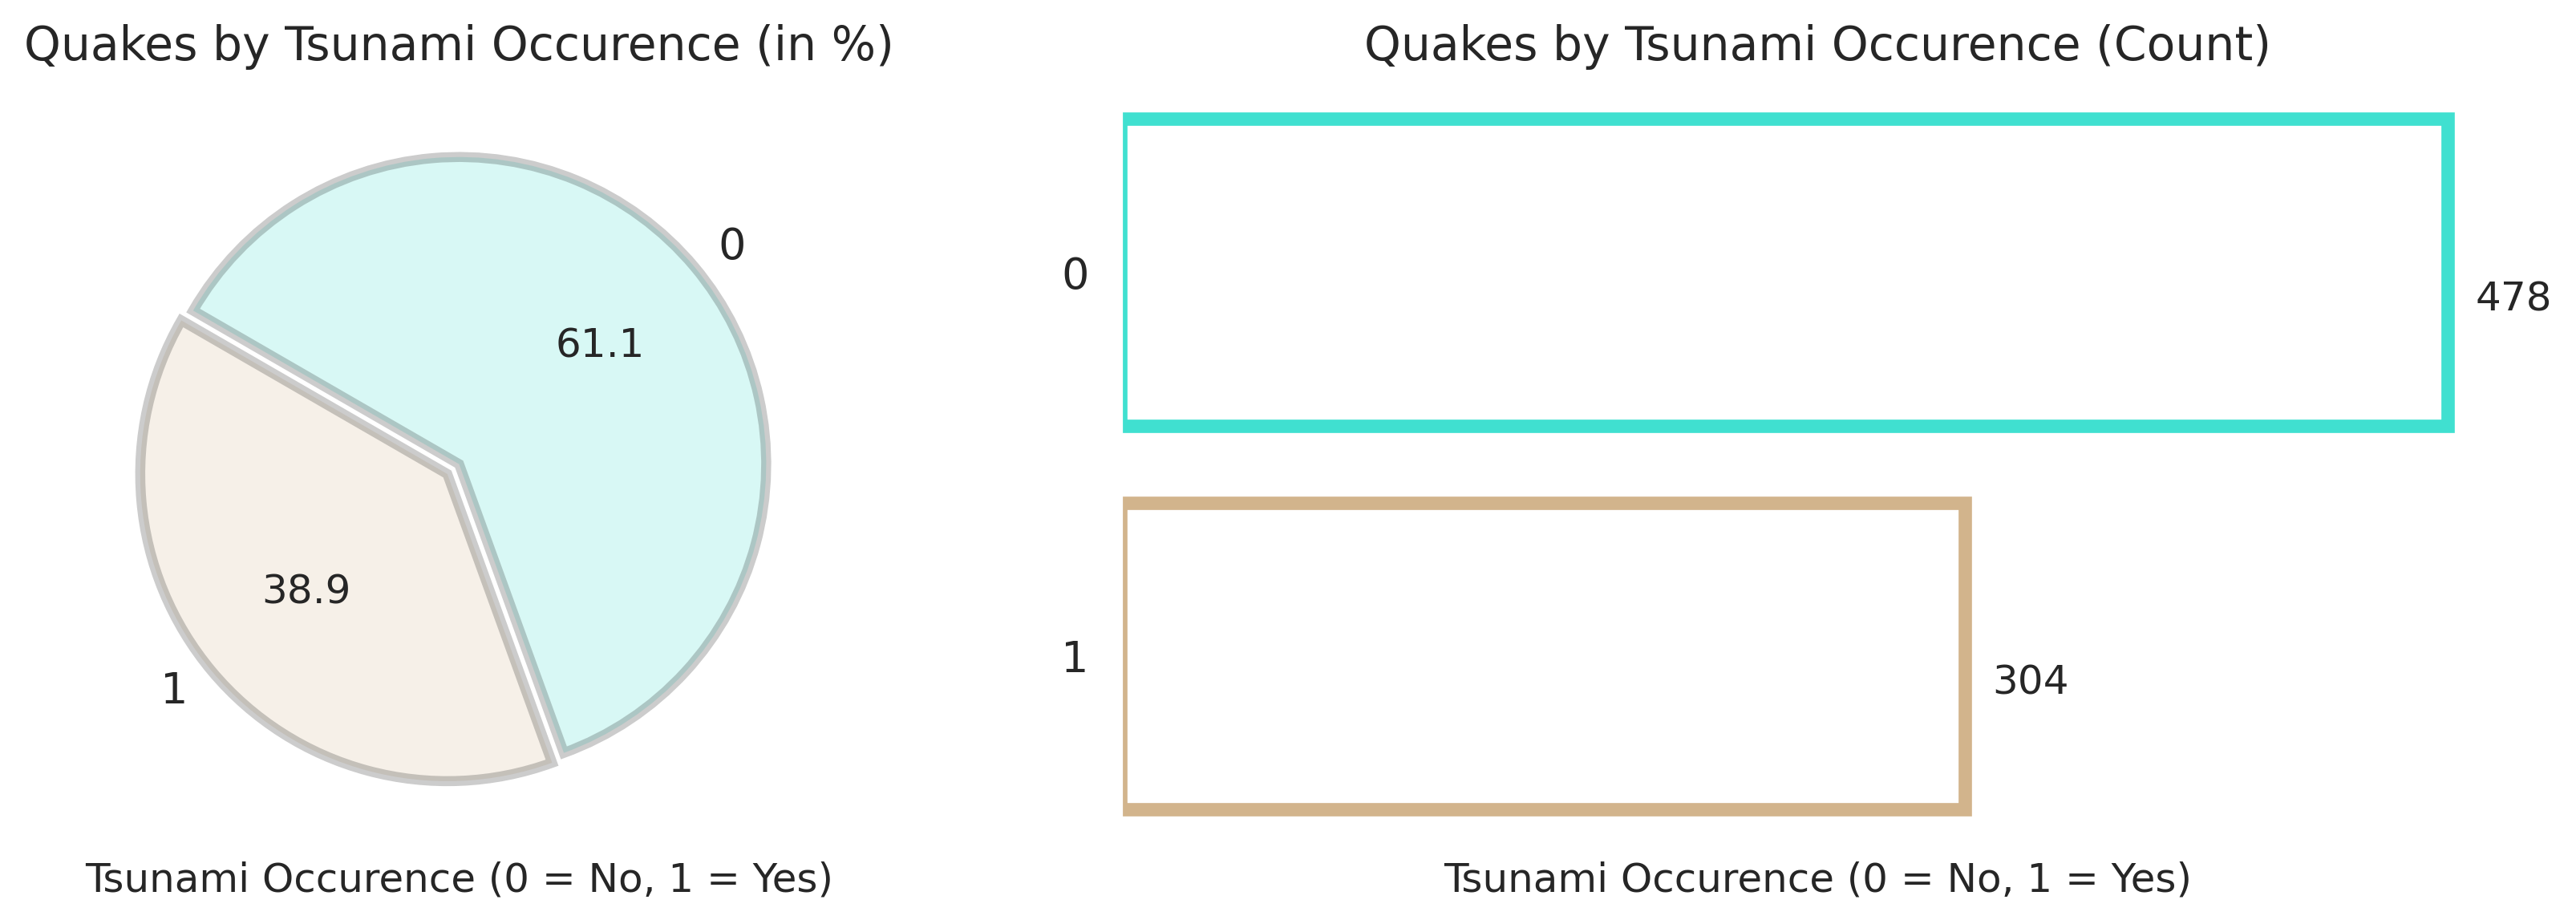

In [11]:
## Understand Tsunami Occurence during earthquake events

plt.subplots(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Quakes by Tsunami Occurence (in %)',fontsize=14)
my_xpl = [0.0, 0.05]
df['tsunami'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.2, 'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f')
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)

plt.subplot(1,2,2)
plt.title('Quakes by Tsunami Occurence (Count)',fontsize=14)
ax = sns.countplot(y='tsunami', data=df, facecolor=(1,1,1,1), linewidth=4, edgecolor=sns.color_palette(my_col, 2), order=df['tsunami'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 10, p.get_y()+0.5))

plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)
plt.xticks([]), plt.ylabel(None)
    
plt.show()

- Here, "1" stands for earthquakes occured in oceanic regions causing tsunami and other oceanic events.
- As per the data we have, around **39%** of the earthquakes have **occured in the oceanic areas**. 
- On the otherhand, about **61%** earthquakes have occured in non-oceanic areas, i.e., **on land**. 

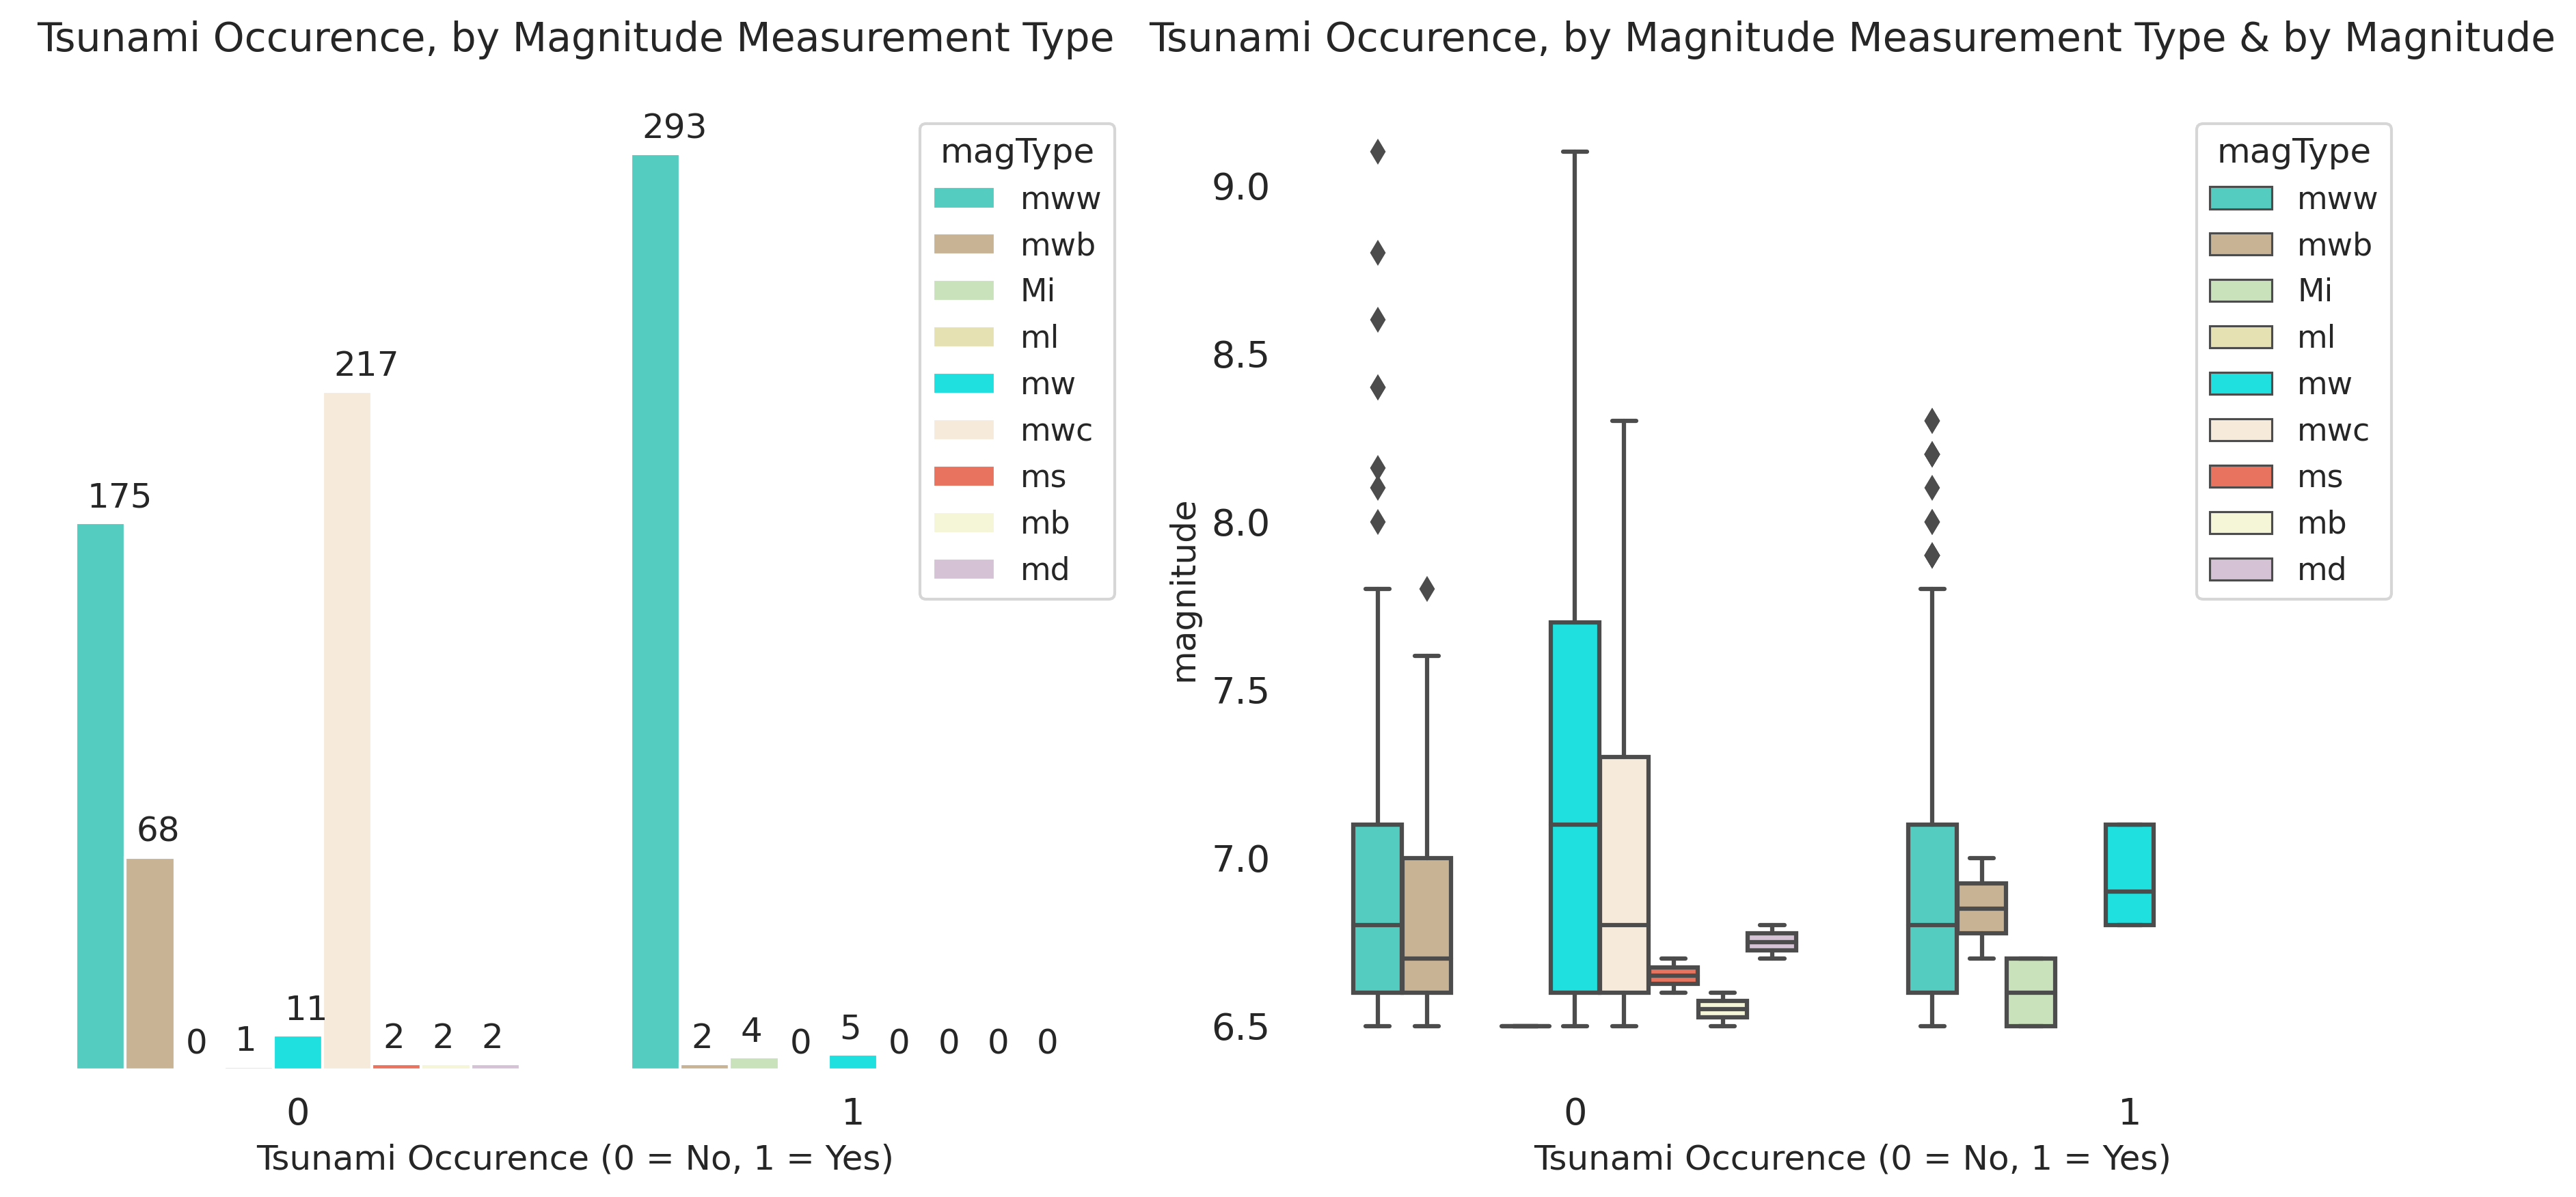

In [12]:
## Earthquakes by Tsunami Occurence, by  Magnitude Measurement

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Tsunami Occurence, by Magnitude Measurement Type', pad=20, fontsize=14)
ax = sns.countplot(data=df, x='tsunami', hue='magType', palette=my_col)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+5))
plt.ylabel(None), plt.yticks([])
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)

plt.subplot(1,2,2)
plt.title('Tsunami Occurence, by Magnitude Measurement Type & by Magnitude', pad=20, fontsize=14)
sns.boxplot(data=df, x="tsunami", y="magnitude", hue="magType", palette=my_col)
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)

plt.show()

**Key Observations**
- For quakes occuring in oceans, **mww** is the widely used measurement type.
- On the other hand, **mwc** is the preferred measurement type for **quakes occuring on land**.

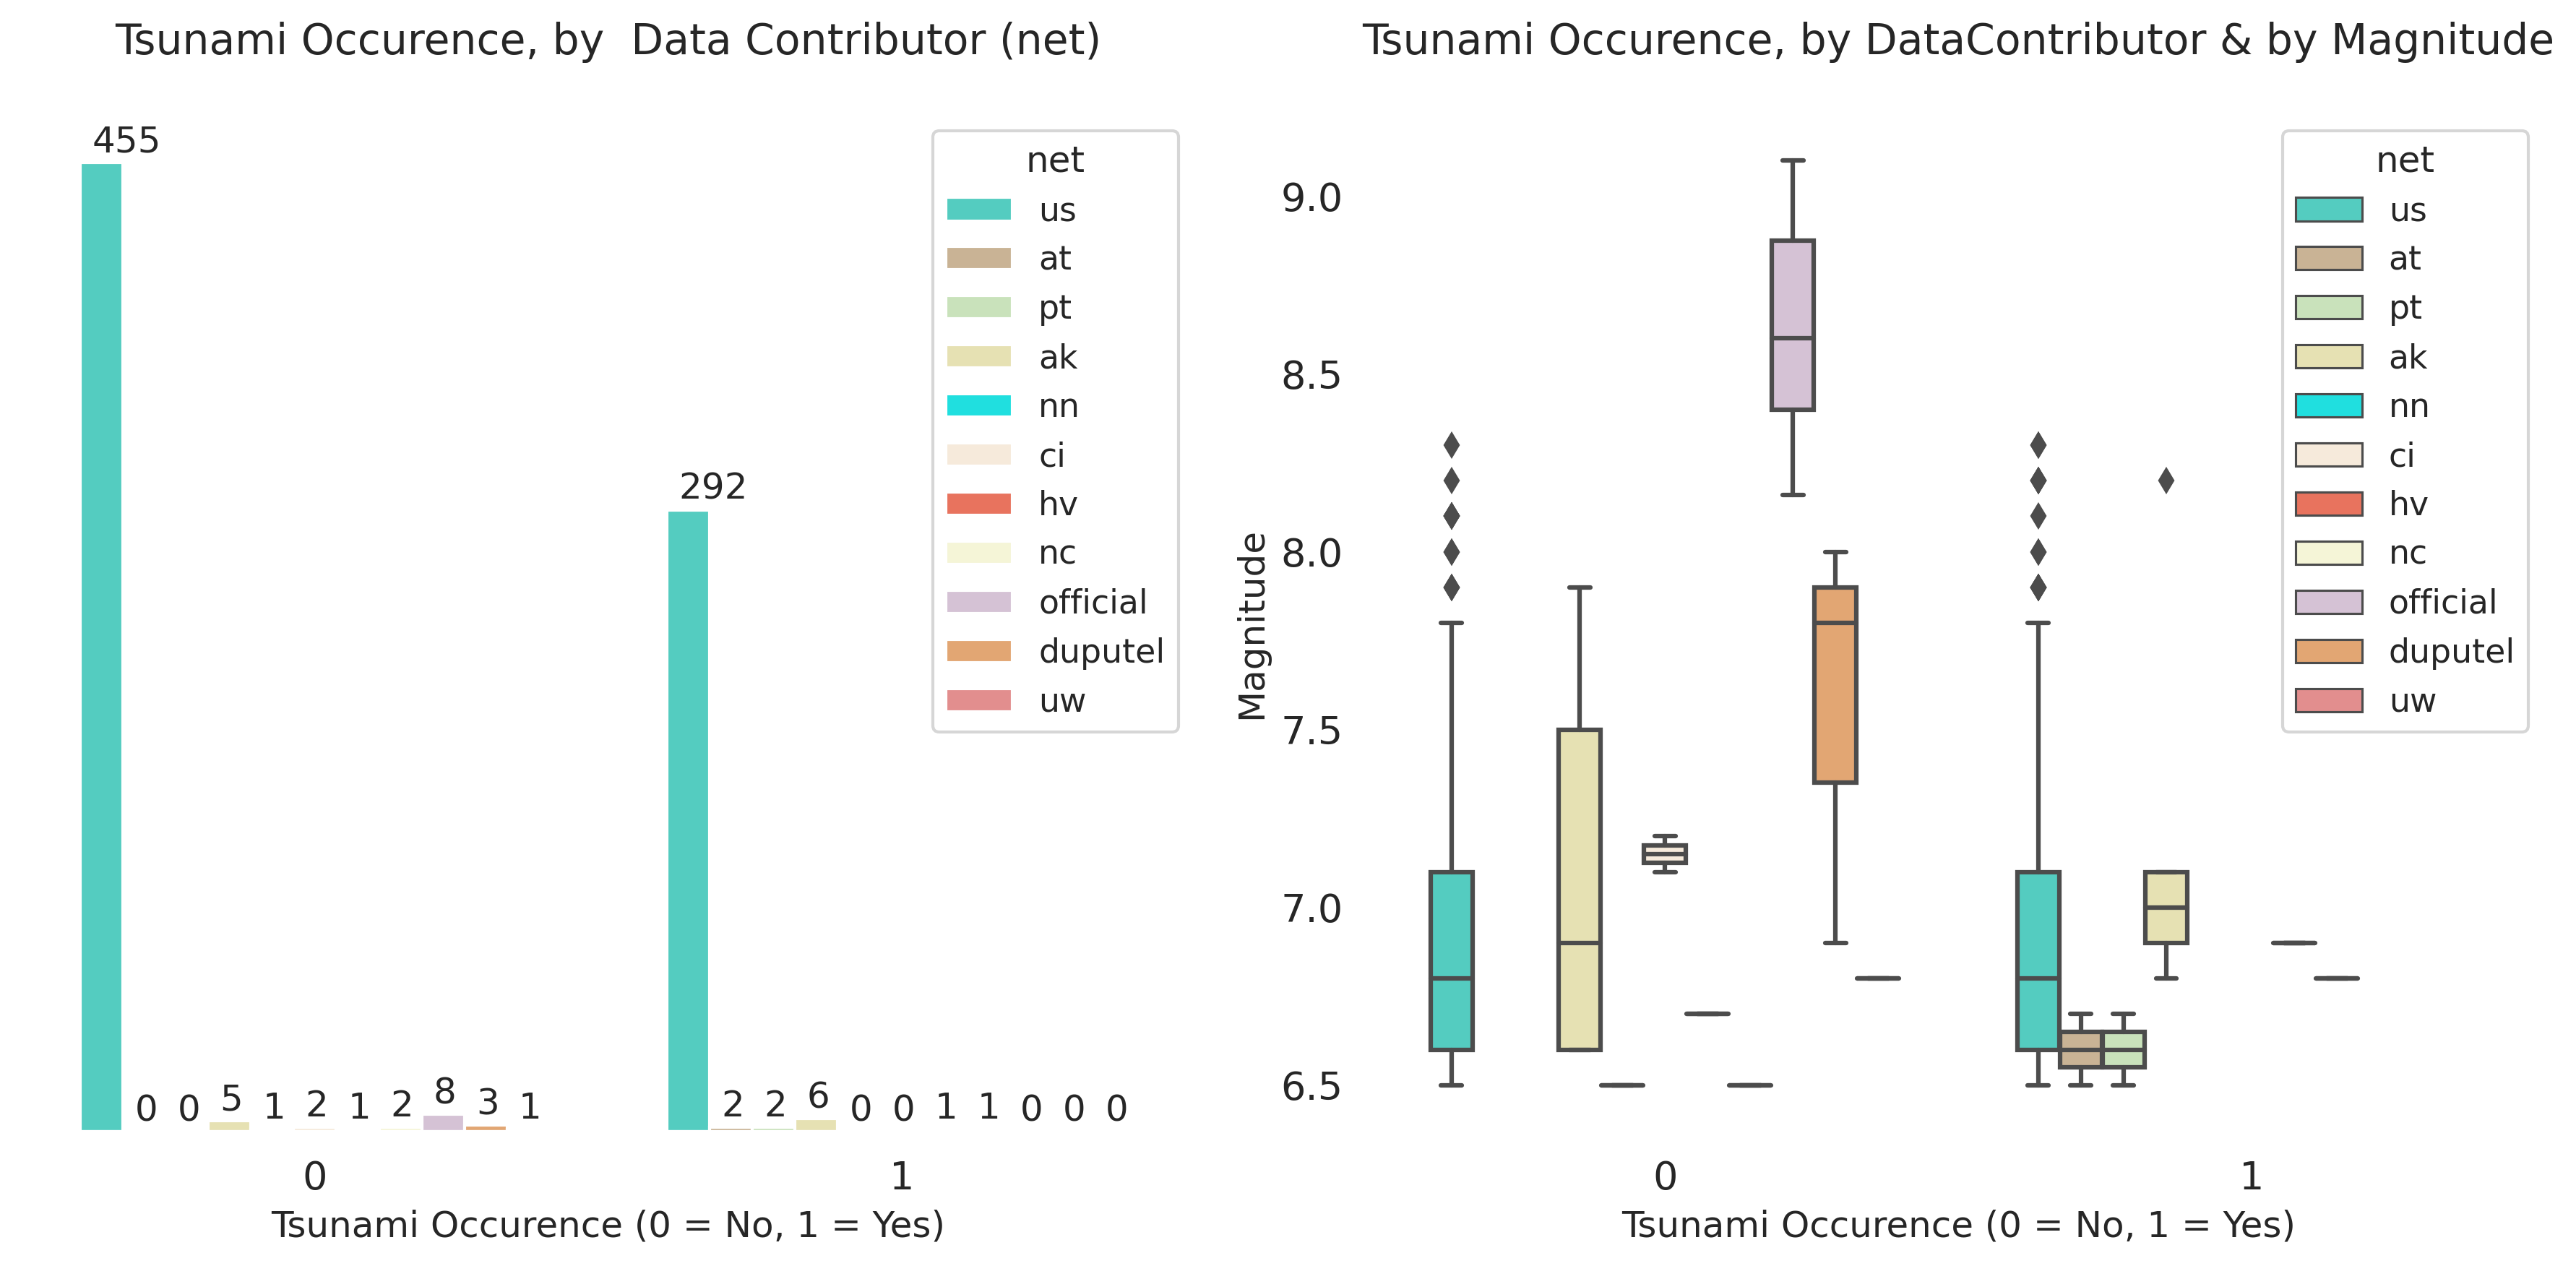

In [13]:
## Earthquakes by Tsunami Occurence, by  Data Contributor (net)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Tsunami Occurence, by  Data Contributor (net)', pad=20, fontsize=14)
ax = sns.countplot(x='tsunami', hue='net', palette=my_col, data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+5))
plt.ylabel(None), plt.yticks([])
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)

plt.subplot(1,2,2)
plt.title('Tsunami Occurence, by DataContributor & by Magnitude', pad=20, fontsize=14)
sns.boxplot(data=df, x="tsunami", y="magnitude", hue="net", palette=my_col)
plt.ylabel('Magnitude')
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)', fontsize=12)

plt.show()

**Key Observations**
- For both, tsunami and non-tsunami events, **us** represents the most preferred data contributor.
- It appears that for high magnitude quakes, **official** and **duputel** are the primary data contributors.

In [14]:
## Analyse the data by Year, Month, Day of the month, and Hour of the day.

## Make a new Date, Year, Month, Day, & Hour columns from the 'date_time' column for our analysis

df['Date'] = pd.to_datetime(df['date_time']).dt.date
df['Year'] = pd.to_datetime(df['date_time']).dt.year
df['Month'] = pd.to_datetime(df['date_time']).dt.month
df['Day'] = pd.to_datetime(df['date_time']).dt.day
df['Hour'] = pd.to_datetime(df['date_time']).dt.hour

## Check the new columns we have created in our dataset

df[['date_time', 'Date', 'Year', 'Month', 'Day', 'Hour']].head(5)

date_time        Date  Year  Month  Day  Hour
0  22-11-2022 02:03  2022-11-22  2022     11   22     2
1  18-11-2022 13:37  2022-11-18  2022     11   18    13
2  12-11-2022 07:09  2022-12-11  2022     12   11     7
3  11-11-2022 10:48  2022-11-11  2022     11   11    10
4  09-11-2022 10:14  2022-09-11  2022      9   11    10

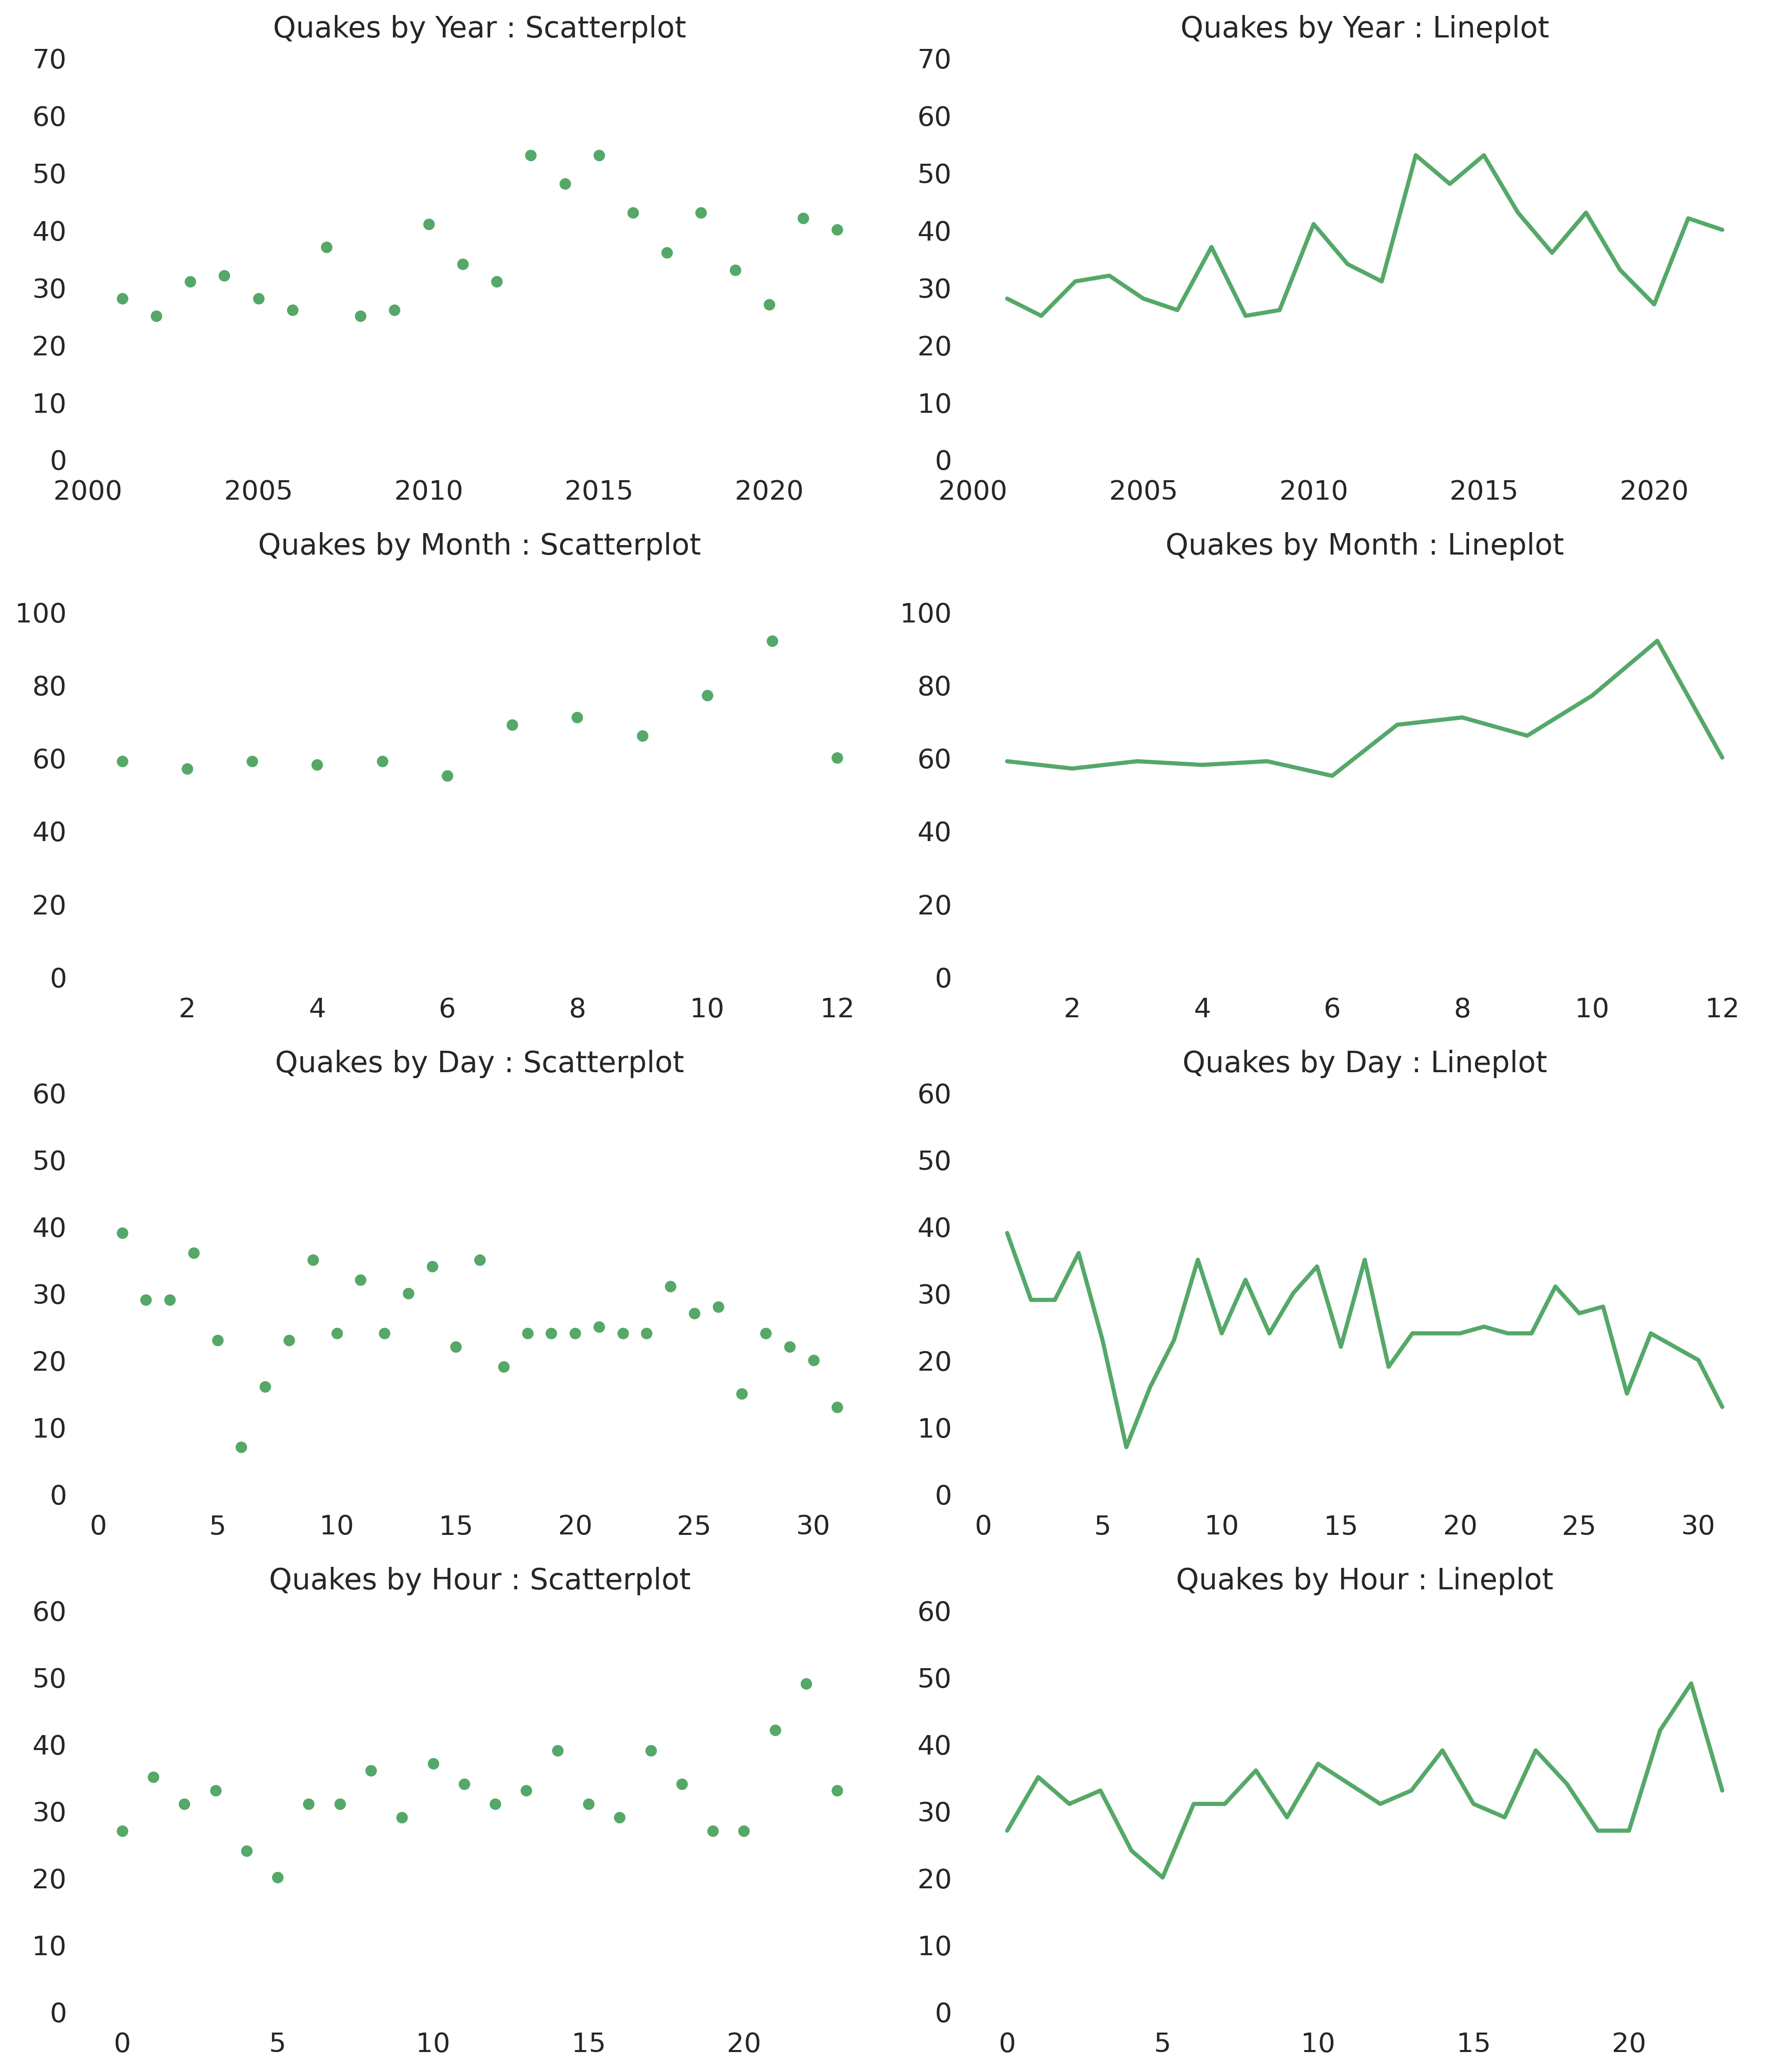

In [15]:
## Now, let's visualise the earthquake events by Year, Month, Day, and Hour with Scatterplots & Lineplots

plt.subplots(figsize=(12,14))

## By Year
###########

plt.subplot(421)
plt.title('Quakes by Year : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Year'].value_counts().sort_values(), color='g')
plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

plt.subplot(422)
plt.title('Quakes by Year : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Year'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

## By Month
###########

plt.subplot(423)
plt.title('Quakes by Month : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Month'].value_counts().sort_values(), color='g')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(424)
plt.title('Quakes by Month : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Month'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

## By Day
###########

plt.subplot(425)
plt.title('Quakes by Day : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Day'].value_counts().sort_values(), color='g')
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.subplot(426)
plt.title('Quakes by Day : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Day'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

## By Hour
###########

plt.subplot(427)
plt.title('Quakes by Hour : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Hour'].value_counts().sort_values(), color='g')
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.subplot(428)
plt.title('Quakes by Hour : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Hour'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.show()

**From the above graphs, it can be determined that the** 

- The number of earthquakes events was fairly high in **2013, 2014 & 2015**.
- **November** was the month when most earthquakes have occured.
- By hour of the day, occurence of earthquakes is **lowest between 4 a.m. and 5 a.m.** (early morning), whereas it is **highest between 9 p.m. and 10 p.m.** (night time).

In [16]:
## Now we'll visualise the data by country
## But the country column has many missing values, we'll fix them and plot the data

## Let's fill the missing values in country column with information available in the location column

## Create a new dataframe using the location information in the earthquake dataset
## Make it into a two column dataframe by moving the last word of the location information in to the second (last) column
## Now the second column of new dataframe has country name, which we use to fill in our original dataset

df_r = df['location'].str.split(pat=',', n=1, expand=True)
print(df_r.head(5))                       ## View the new dataframe

## fill the missing country data, with country names in country column of df_r (df_r[1] is the country column)

df['country'] = df['country'].fillna(df_r[1])  
print('\n', 'Missing values in the refined country column are : ', df['country'].isna().sum())

          0                 1
0   Malango   Solomon Islands
1  Bengkulu         Indonesia
2       NaN               NaN
3    Neiafu             Tonga
4       NaN               NaN

 Missing values in the refined country column are :  45


In [17]:
# Making a fresh dataframe by droping null values from 'country','location','continent' columns

df_country=df.dropna(subset=['country','location','continent'], how='all')
print('\n', 'Missing values in the country column are : ', df_country['country'].isnull().sum())


 Missing values in the country column are :  42


In [18]:
## Now we check the missing values in location column, and label them as 'unknown'

print('\n', 'Missing location values Before : ', df_country['location'].isnull().sum())
df_country['location']=df_country['location'].fillna('unknown')
print('\n', 'Missing location values After  : ', df_country['location'].isnull().sum())


 Missing location values Before :  2

 Missing location values After  :  0


In [19]:
## We try to fill location names as missing country names, and refine it later

df_country['country'] = df_country['country'].fillna(df_country['location'])

## Check the null values in country column

df_country['country'].isnull().sum()

0

**How we added missing country names from the available location information - Let's do a brief retrospective** 

- Of the 782 records in the dataset, **country names were missing for 298 records**, whereas location information was missing for 5 records. So we decieded to **fill the country names from location**, which has country name in it.
- First, we created a new dataframe with the location information in the earthquake dataset. We made it in a two column format by moving the last word of the location information in to the second (last) column (which infact is the country name). 
- Later we filled the missing country names with the data (i.e., country name) we have in the second column of the new dataframe.
- We further processed the location column, to fill all the country names. 
- **BOOOM!!!** Now all the missing data is filled with pertaining country names. **Our missing data problem solved**.
- However, the country names column requires some optimisation which we do in our later steps at the time of visualising the data.

In [20]:
## Let's have a look at the country names in the country column

df_country['country'].unique()

array(['Solomon Islands', ' Indonesia', 'Fiji', ' Tonga',
       'the Fiji Islands', 'Panama', 'Mexico', 'Taiwan', ' Vanuatu',
       'Papua New Guinea', "People's Republic of China",
       'the Kermadec Islands', 'Philippines', 'Brazil', 'Peru',
       'Argentina', ' Nicaragua', 'the Loyalty Islands', ' New Caledonia',
       ' Japan', 'Indonesia', ' New Zealand', 'Kermadec Islands region',
       ' Alaska', ' Cyprus', 'United States of America', 'Vanuatu region',
       'Antarctica', 'Vanuatu', 'South Sandwich Islands region', 'Haiti',
       ' Philippines', ' Panama', ' Wallis and Futuna',
       'Mauritius - Reunion region', 'Japan', ' Russia', 'Mongolia',
       ' Chile', 'Greece', 'central Mid-Atlantic Ridge', 'Chile',
       ' Solomon Islands', ' Greece', 'Russia', ' Jamaica', 'Turkey',
       ' Fiji',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       ' Australia', ' El Salvador', ' South Sandwich Islands', 'Ecuador',
       'Prince Edward Islands regi

- The column requires refinements, as **repeated** and **inappropriate** country names and **extra spaces** are seen at several places.
- For example, **Fiji is appearing in four forms** –'Fiji', 'the Fiji Islands', ' Fiji', 'Fiji region'– which  we can club them into one single label. 
- Similarly, country names like **United States of America**, and **United Kingdom of Great Britain and Northern Ireland (the)**, can be shortened as **USA**, and **UK**, respectively. 
- We retain remote Island territories like **Svalbard and Jan Mayen**, **Wallis and Futuna**, **Northern Mariana Islands** as-is, without clubbing them with the country they belong. 

In [21]:
## Now we refine the column, for analysing and visualising the data country-wise

## First we remove all the extra spaces in the country column (in fact, the code will erase all the extra spaces across the dataset)

df_country = df_country.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Next we refine some country names

df_country.replace({'country': {"the Fiji Islands" : "Fiji region", "Fiji" : "Fiji region", 
                                "the Kermadec Islands" : "New Zealand region", "the Loyalty Islands" : "New Caledonia", 
                                "Vanuatu" : "Vanuatu region", "South Sandwich Islands" : "South Sandwich Islands region", 
                                "South Georgia and the South Sandwich Islands" : "South Sandwich Islands region", 
                                "Prince Edward Islands region" : "Canada", "Okhotsk" : "Russia region", 
                                "off the west coast of northern Sumatra" : "Indonesia", 
                                "Philippine Islands region" : "Philippines", 
                                "the Kuril Islands" : "Kuril Islands", 
                                "United Kingdom of Great Britain and Northern Ireland (the)": "UK", 
                                "People's Republic of China": "CHINA", "United States of America": "USA", 
                                "Alaska": "USA", "Aleutian Islands, Alaska" : "USA", "California" : "USA", 
                                "India" : "India region", "Russia" : "Russia region", "New Zealand" : "New Zealand region", 
                                "Japan region" : "Japan"}}, inplace=True)

df_country['country'].unique()

array(['Solomon Islands', 'Indonesia', 'Fiji region', 'Tonga', 'Panama',
       'Mexico', 'Taiwan', 'Vanuatu region', 'Papua New Guinea', 'CHINA',
       'New Zealand region', 'Philippines', 'Brazil', 'Peru', 'Argentina',
       'Nicaragua', 'New Caledonia', 'Japan', 'Kermadec Islands region',
       'USA', 'Cyprus', 'Antarctica', 'South Sandwich Islands region',
       'Haiti', 'Wallis and Futuna', 'Mauritius - Reunion region',
       'Russia region', 'Mongolia', 'Chile', 'Greece',
       'central Mid-Atlantic Ridge', 'Jamaica', 'Turkey', 'UK',
       'Australia', 'El Salvador', 'Ecuador', 'Canada',
       'Svalbard and Jan Mayen', 'Venezuela', 'Bolivia', 'Honduras',
       'Bouvet Island region', 'Costa Rica', 'Iran', 'Guatemala',
       'Botswana', 'Italy', 'Myanmar', 'Northern Mariana Islands',
       'Afghanistan', 'India region', 'Tajikistan', 'Barbados', 'Nepal',
       'Guam', 'Micronesia region', 'Pakistan', 'Colombia',
       'northern Mid-Atlantic Ridge', 'Samoa', 'Kyrgyzsta

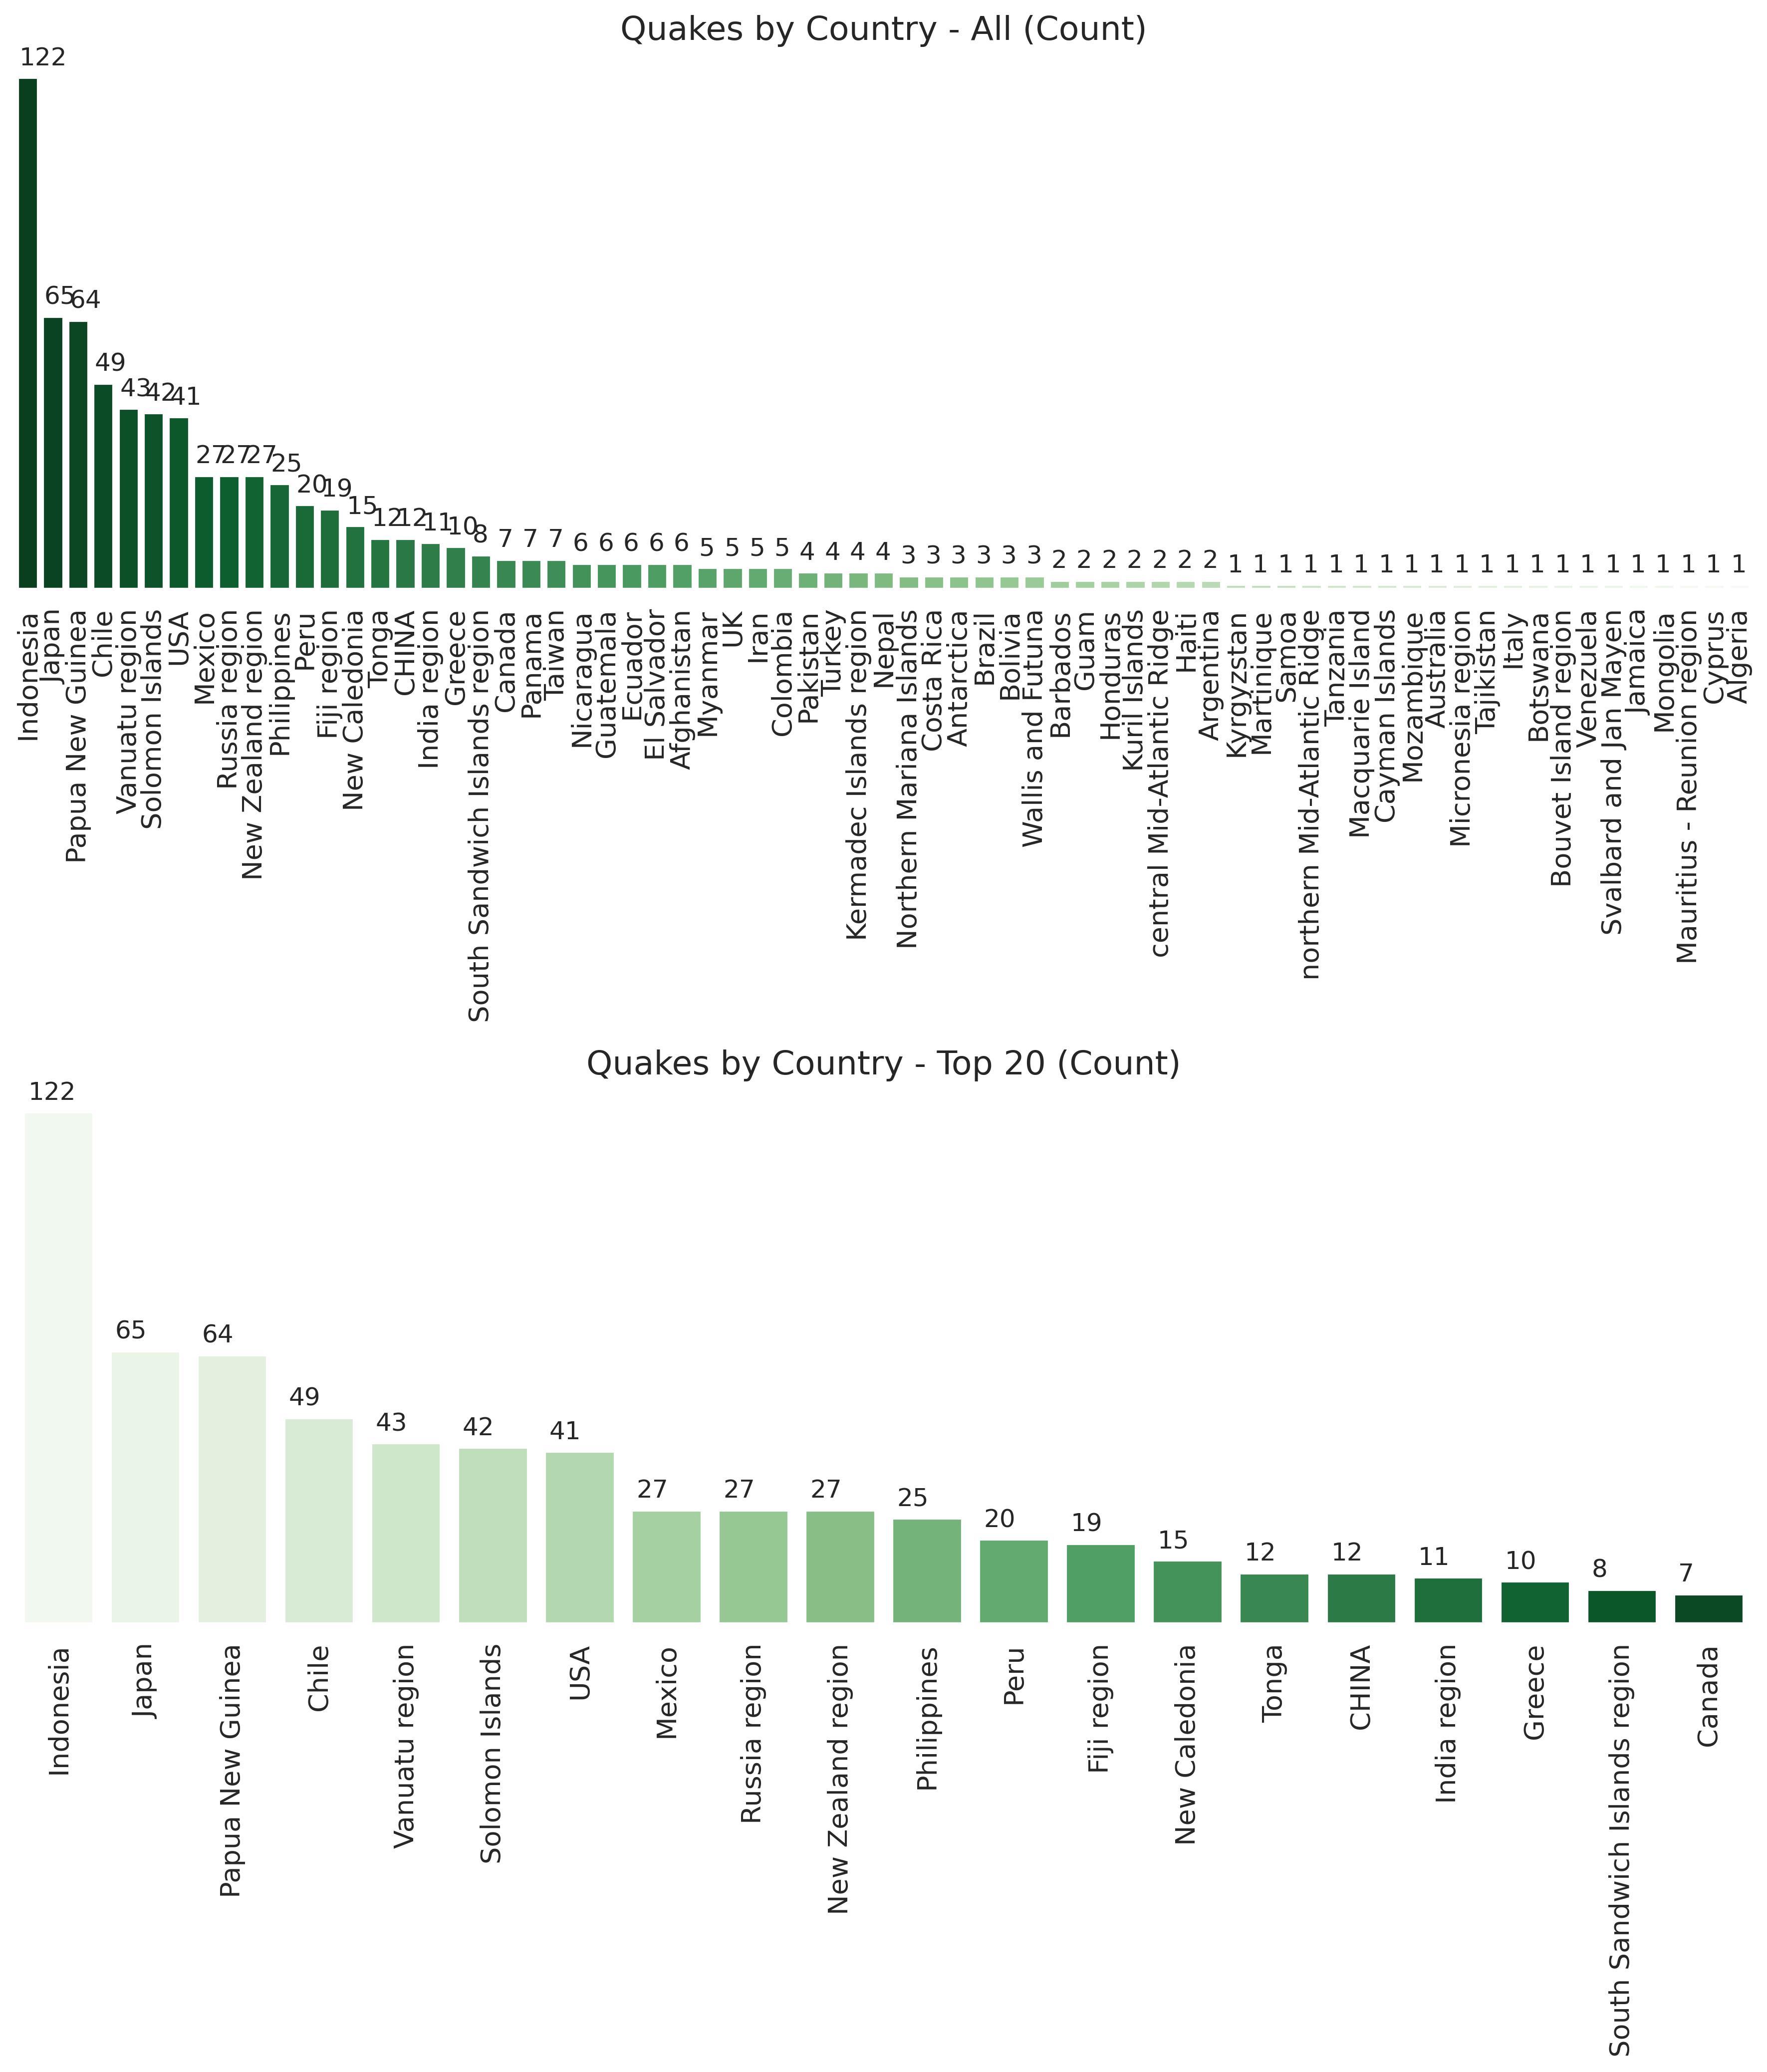

In [22]:
## Now We plot country-wise data with barplots for all the countries and for top 20 countries

plt.subplots(figsize=(12,14))

plt.subplot(211)
plt.title('Quakes by Country - All (Count)', fontsize=16)
ax = sns.countplot(x=df_country['country'], palette='Greens_r', alpha=1, order=df_country['country'].value_counts().index)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(212)
plt.title('Quakes by Country - Top 20 (Count)', fontsize=16)
ax = sns.countplot(x=df_country['country'], palette='Greens', alpha=1, order=df_country['country'].value_counts().head(20).index)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

In [23]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [24]:
import folium
from folium import plugins

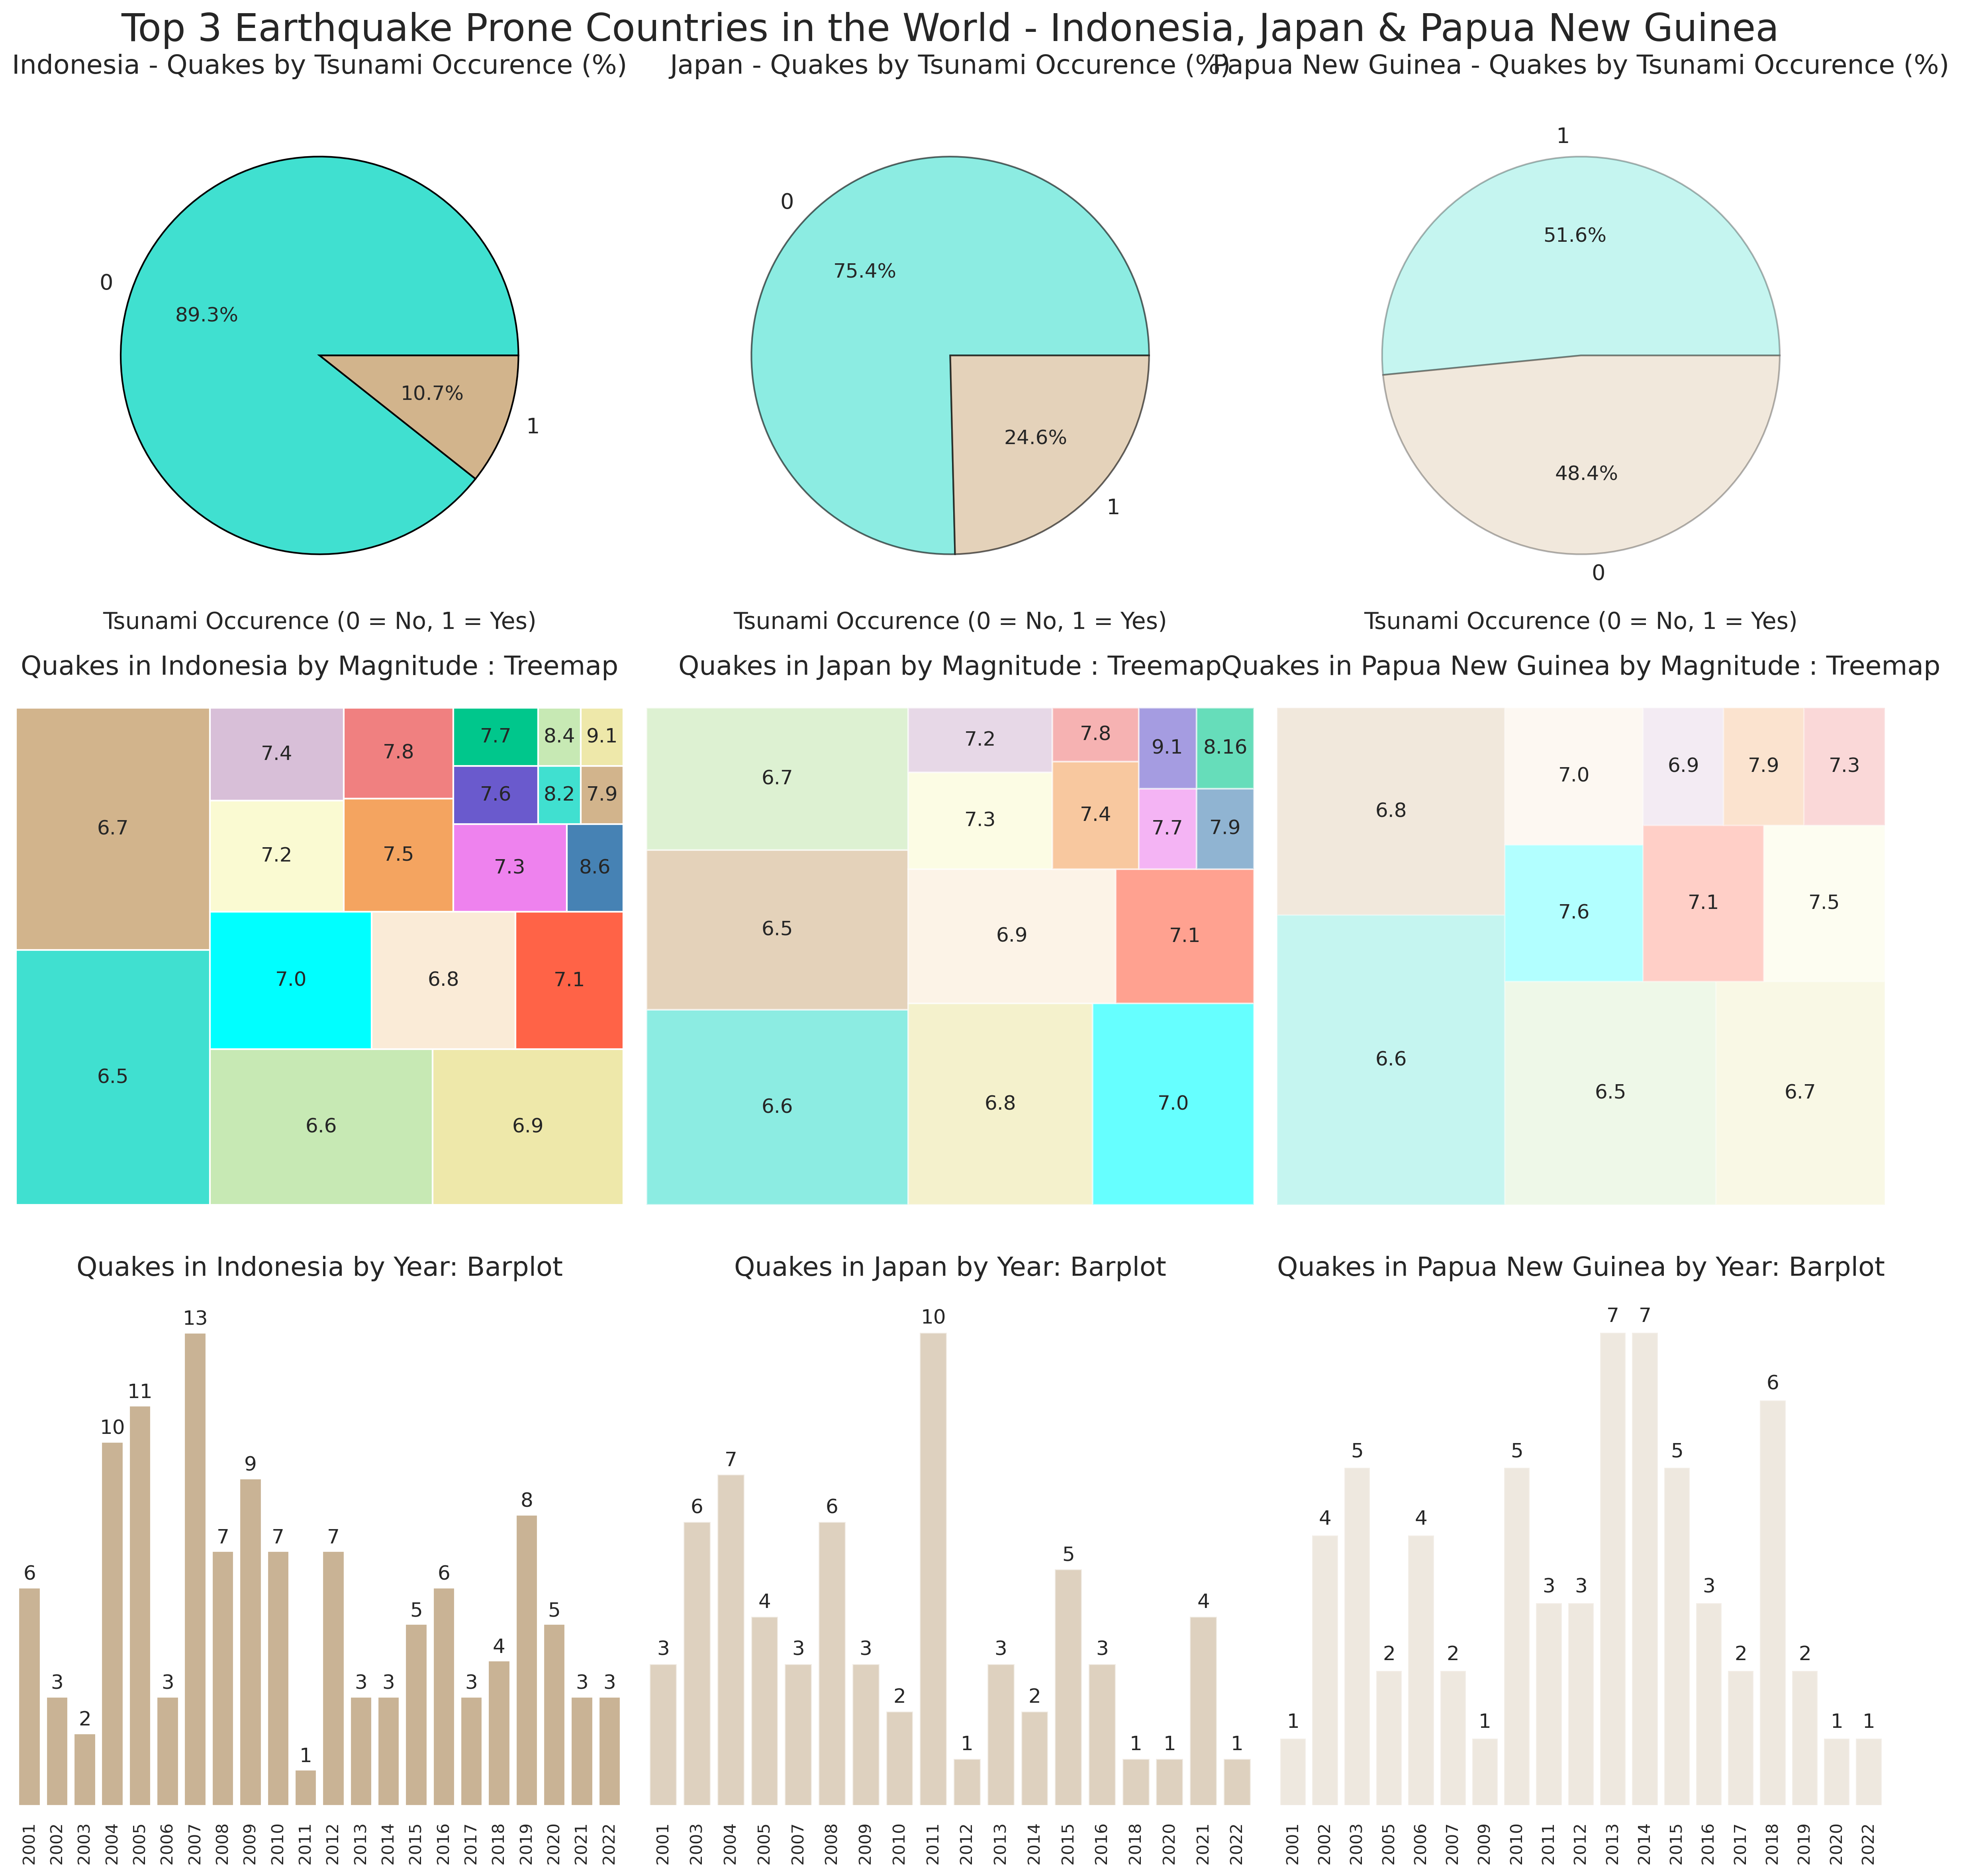

In [25]:
## From the above country-wise analysis we saw that Indonesia, Japan, and Papua New Guinea have highest number of quakes 
## Let's analyse these three most quake prone countries through appropriate visuals 

plt.subplots(figsize=(16,16))
plt.suptitle('Top 3 Earthquake Prone Countries in the World - Indonesia, Japan & Papua New Guinea', fontsize=23)

plt.subplot(3,3,1)
plt.title('Indonesia - Quakes by Tsunami Occurence (%)', pad=20, fontsize=16)
df_country[df_country['country'] == "Indonesia"]['tsunami'].value_counts().plot(kind='pie', subplots=True, colors = my_col, legend=None, ylabel='', wedgeprops={'alpha':1, 'edgecolor' : 'black','linewidth': 1, 'antialiased': True}, autopct='%1.1f%%')
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)', fontsize=14)

plt.subplot(3,3,2)
plt.title('Japan - Quakes by Tsunami Occurence (%)', pad=20, fontsize=16)
df_country[df_country['country'] == "Japan"]['tsunami'].value_counts().plot(kind='pie', subplots=True, colors = my_col, legend=None, ylabel='', wedgeprops={'alpha':0.6, 'edgecolor' : 'black','linewidth': 1, 'antialiased': True}, autopct='%1.1f%%')
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)', fontsize=14)

plt.subplot(3,3,3)
plt.title('Papua New Guinea - Quakes by Tsunami Occurence (%)', pad=20, fontsize=16)
df_country[df_country['country'] == "Papua New Guinea"]['tsunami'].value_counts().plot(kind='pie', subplots=True, colors = my_col, legend=None, ylabel='', wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 1, 'antialiased': True}, autopct='%1.1f%%')
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)', fontsize=14)

plt.subplot(3,3,4)
plt.title('Quakes in Indonesia by Magnitude : Treemap', pad=20, fontsize=16)
labels = df_country[df_country['country'] == "Indonesia"]['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df_country[df_country['country'] == "Indonesia"]['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=1)
plt.axis('off')

plt.subplot(3,3,5)
plt.title('Quakes in Japan by Magnitude : Treemap', pad=20, fontsize=16)
labels = df_country[df_country['country'] == "Japan"]['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df_country[df_country['country'] == "Japan"]['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.6)
plt.axis('off')

plt.subplot(3,3,6)
plt.title('Quakes in Papua New Guinea by Magnitude : Treemap', pad=20, fontsize=16)
labels = df_country[df_country['country'] == "Papua New Guinea"]['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df_country[df_country['country'] == "Papua New Guinea"]['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.3)
plt.axis('off')

plt.subplot(3,3,7)
plt.title('Quakes in Indonesia by Year: Barplot', pad=20, fontsize=16)
ax = sns.countplot(x='Year', data=df_country[df_country['country'] == "Indonesia"], color='#D2B48C', alpha=1)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

plt.subplot(3,3,8)
plt.title('Quakes in Japan by Year: Barplot', pad=20, fontsize=16)
ax = sns.countplot(x='Year', data=df_country[df_country['country'] == "Japan"], color='#D2B48C', alpha=0.6)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

plt.subplot(3,3,9)
plt.title('Quakes in Papua New Guinea by Year: Barplot', pad=20, fontsize=16)
ax = sns.countplot(x='Year', data=df_country[df_country['country'] == "Papua New Guinea"], color='#D2B48C', alpha=0.3)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

plt.show()

In [26]:
## Indonesia Earthquake Heat Map
print("Earthquakes in Indonesia  -  Heat Map")
heat_map = df[["latitude", "longitude"]].values
Indonesia = folium.Map(location=[0, 105], zoom_start=4)
Indonesia.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
Indonesia


Earthquakes in Indonesia  -  Heat Map


In [27]:
## Japan Heat Earthquake Map
print("Earthquakes in Japan  -  Heat Map")
japan = folium.Map(location=[38, 140], zoom_start=4)
japan.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
japan

Earthquakes in Japan  -  Heat Map


In [28]:
## Papua New Guinea Earthquake Heat Map
print("Earthquakes in Papua New Guinea  -  Heat Map")
papua_new_guinea = folium.Map(location=[2, 150], zoom_start=4)
papua_new_guinea.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
papua_new_guinea

Earthquakes in Papua New Guinea  -  Heat Map


**Top 3 Earthquake Prone Countries - Analyst's Perspective in Brief**

- **Indonesia** suffered **atleast 1 earthquake** of magnitude 6.5 and above, **every year between 2001-2022**. 
- A majority quakes are non-tsunami quakes, i.e., occuring on land, whereass **tsunami quakaes** accounted for just around **10%** of total quakes in the country since 2001.
- The year 2007 was the year of earthquakes for Indonesia as **around 13 quakes** have occured during that year. 
- Majority quakes in Indonesia are of magnitude 6.5 and 6.7.


- **Japan** had most number of quakes in 2011 (including the **Fukushima** quake). 
- **Tsunami quakes** accounte for around **25%** of total quakes in Japan.


- In **Papua New Guinea**,  tsunami quakes are most common and represent **over 51% share** in total quakes. 
- So far, Papua New Guinea has **never experienced quakes above 8 magnitude**.

In [29]:
## We will conclude the notebook by visualising the worldwide earthquake events by latitude and longitude
print("Earthquakes Across the World  -  Heat Map")
world = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=2)
heat_map = df[["latitude", "longitude"]].values
world.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=13))
world

Earthquakes Across the World  -  Heat Map


**Key Observations**

- Most earthquakes have occured at coastal areas, and in the oceans and seas. 
- More specifically, quake events have predominantly taken place in **Pacific Oecan** and surrounding regions. 
- Not many earthquakes have occured in interior parts, compared to seaside areas.

<p style="float:right; font-family:Calibri (Body); color:black; font-size:15px;" > <br>               Hope you find the notebook useful and relevant.... <br> <br>              Please do share your opinions, views and feedbacks in the comments section.... <br> <br>                        THANK YOU  !!!!...... <br>